**Final Project CS-UY 4563:** Spotify Song Popularity Prediction

Data source: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset/data

Authors: Mahmoud Aboseria & Felina Korte

In [2]:
import pandas as pd
df = pd.read_csv('Spotify_dataset.csv')

# 1) Exploratory data analysis / Clean data

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


We see that there is one unnamed column which keeps track of the index. We can remove this column.

In [ ]:
df = df.drop("Unnamed: 0", axis=1)
df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.shape

(114000, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

Let's change the milliseconds of the duration to seconds.

In [ ]:
df['duration_ms'] = df['duration_ms'] / 1000
df.rename(columns={'duration_ms': 'duration_s'}, inplace=True)

In [ ]:
df.isnull().sum()

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_s          0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [ ]:
# Display rows where at least one value is null
null_rows = df[df.isnull().any(axis=1)]
print(null_rows)

                     track_id artists album_name track_name  popularity  \
65900  1kR4gIb7nGxHPI3D2ifs59     NaN        NaN        NaN           0   

       duration_s  explicit  danceability  energy  key  loudness  mode  \
65900         0.0     False         0.501   0.583    7     -9.46     0   

       speechiness  acousticness  instrumentalness  liveness  valence  \
65900       0.0605          0.69           0.00396    0.0747    0.734   

         tempo  time_signature track_genre  
65900  138.391               4       k-pop  


In [ ]:
# Drop rows where at least one value is null
df = df.dropna(axis=0, how='any', inplace=False)

# Reset index if needed
df = df.reset_index(drop=True)

In [ ]:
df.duplicated().sum()

450

The data card of the kaggle data set states that there are duplicates when the same track can be found in a single and on an album.

In [ ]:
# Keep only the first occurrence of each set of duplicates
df = df.drop_duplicates(subset='track_id')

# Reset index if needed
df.reset_index(drop=True)

df.shape

(113549, 20)

Let's get a feeling for the actual data and how it is distributed:

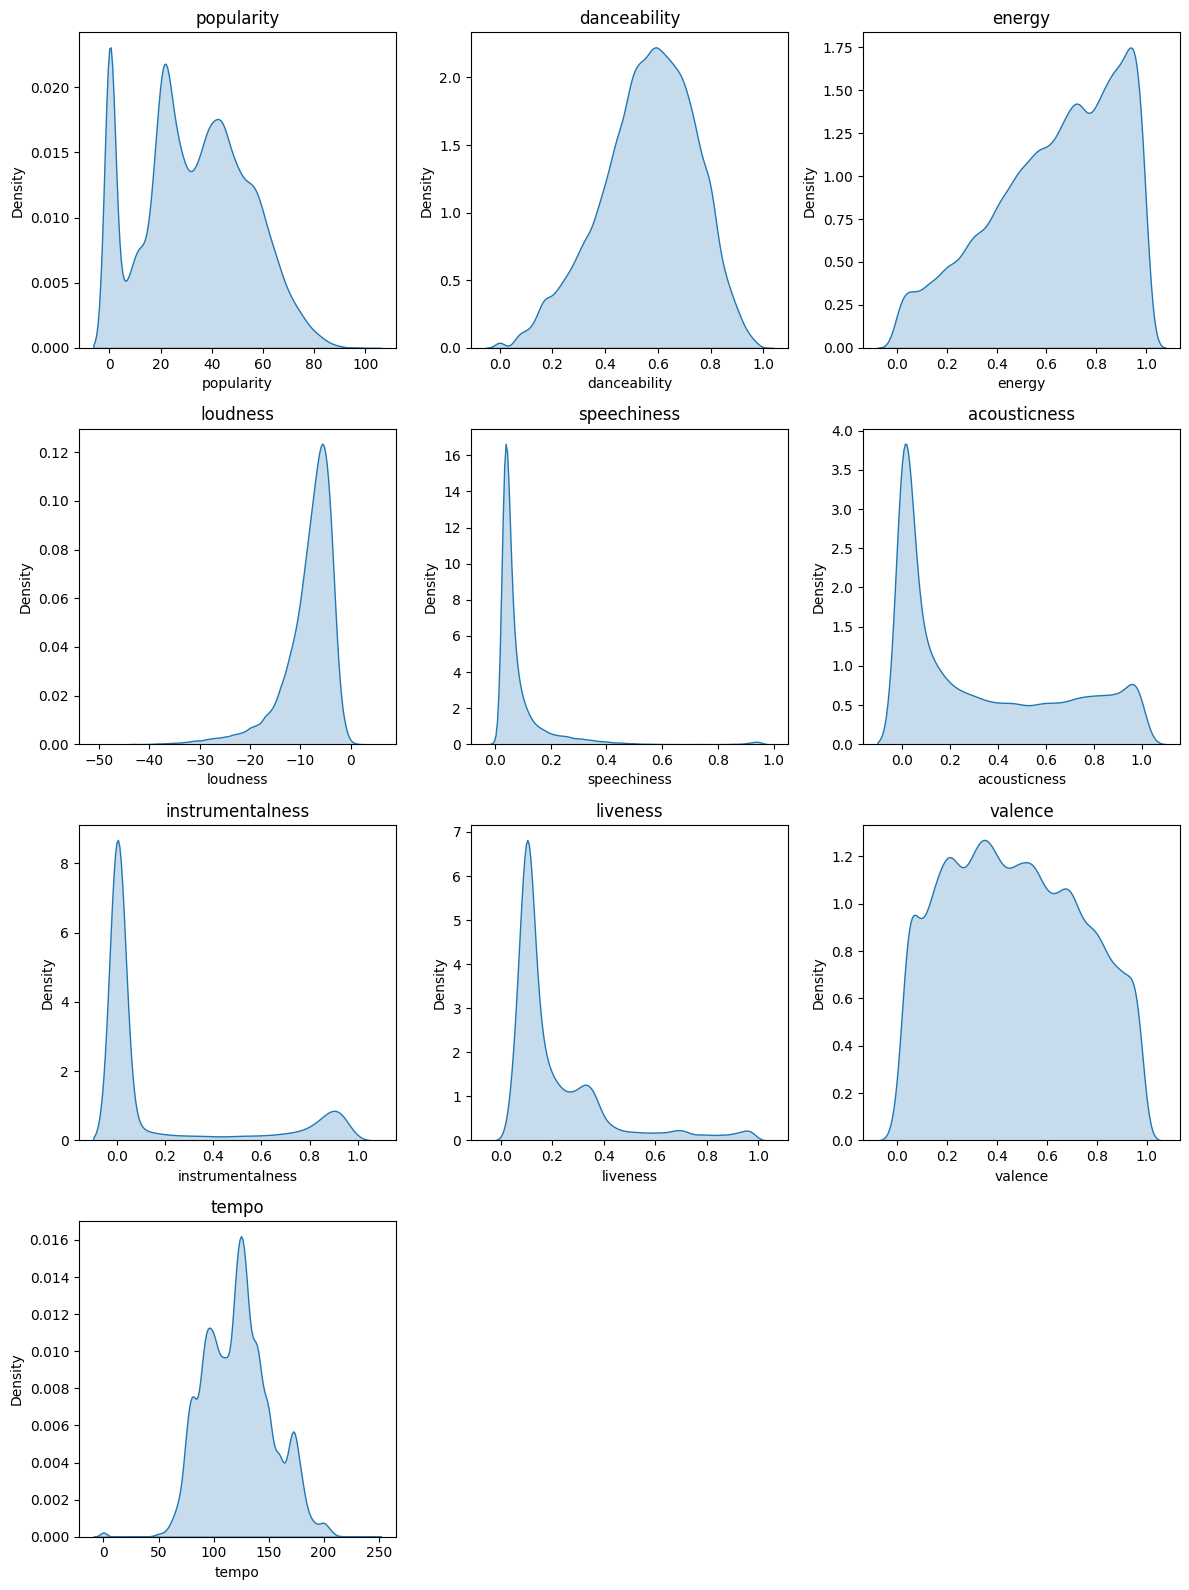

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

numerical_columns = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness',
                     'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

n_cols = 3
n_rows = math.ceil(len(numerical_columns) / n_cols)

# Set up subplots with multiple rows and columns
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(12, 4 * n_rows), dpi=100)

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot KDE for each numerical column
for i, column in enumerate(numerical_columns):
    sns.kdeplot(data=df, x=column, fill=True, ax=axes[i])
    axes[i].set_title(column)

# Remove empty subplots
for i in range(len(numerical_columns), n_rows * n_cols):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

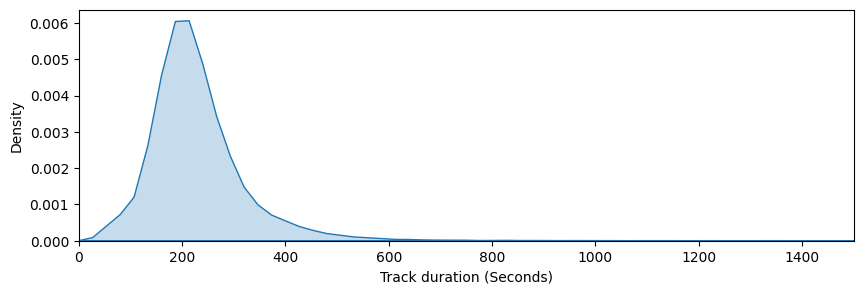

In [ ]:
plt.figure(figsize=(10, 3), dpi=100)
sns.kdeplot(df['duration_s'], fill=True)

plt.xlim(0, 1500)

plt.xlabel('Track duration (Seconds)')
plt.show()

<Axes: xlabel='time_signature', ylabel='count'>

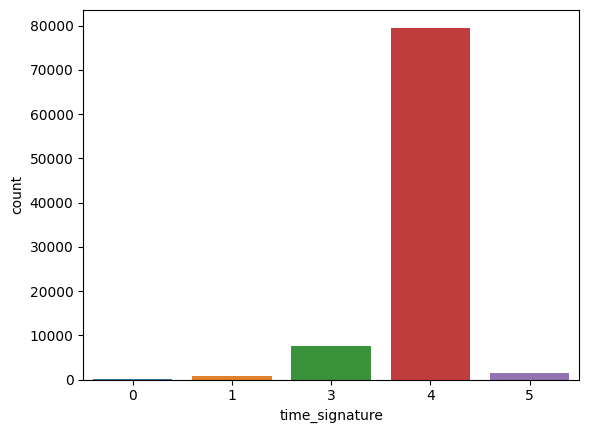

In [ ]:
sns.countplot(data=df.drop_duplicates('track_id'), x='time_signature')

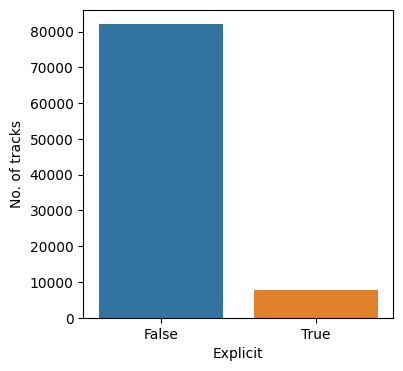

In [ ]:
plt.figure(figsize = (4,4), dpi = 100)
sns.barplot(x = df['explicit'].value_counts().index, y = df['explicit'].value_counts().values)
plt.xlabel('Explicit')
plt.ylabel('No. of tracks')
plt.show()

Create a heatmap to find correlations between features:

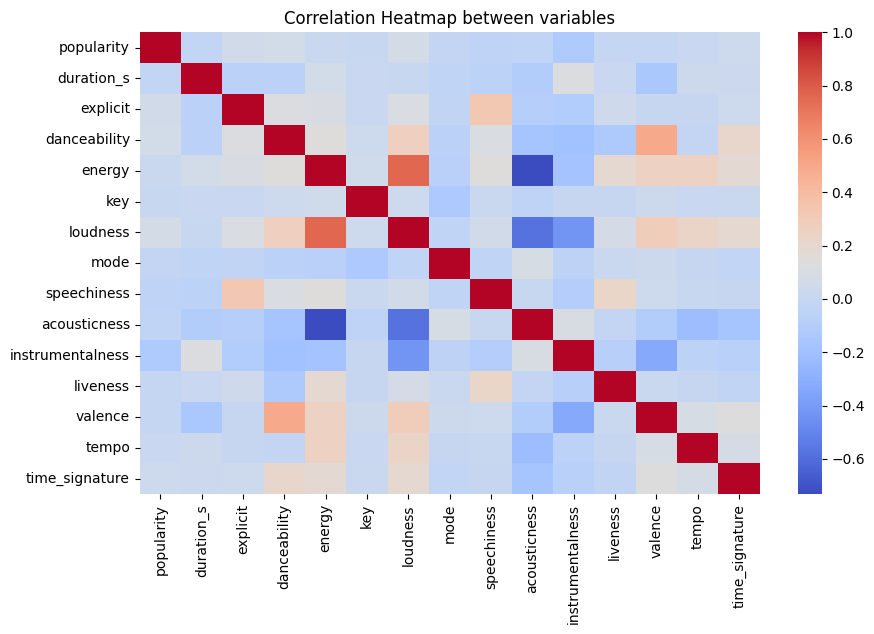

In [ ]:
dataset=df.copy()
plt.figure(figsize=(10,6))
feature_numerical=[feature for feature in df.columns if df[feature].dtype!='O']
sns.heatmap(df[feature_numerical].corr(), cmap='coolwarm')
plt.title("Correlation Heatmap between variables")
plt.show()

We can see that explicit, danceability and loudness seem to have a slightly higher correlation with popularity.

# 2) Predict popularity


Placeholder cell that loads and cleans all data at once:

In [ ]:
import pandas as pd

df = pd.read_csv('Spotify_dataset.csv')

df = df.drop("Unnamed: 0", axis=1)
df.head()

df['duration_ms'] = df['duration_ms'] / 1000
df.rename(columns={'duration_ms': 'duration_s'}, inplace=True)

# Drop rows where at least one value is null
df = df.dropna(axis=0, how='any', inplace=False)
# Reset index if needed
df = df.reset_index(drop=True)

# Keep only the first occurrence of each set of duplicates
df = df.drop_duplicates()
# Reset index if needed
df.reset_index(drop=True)

df = df.drop_duplicates(subset='track_id')

Convert the feature explicit to a boolean:

In [ ]:
df['explicit'] = df['explicit'].astype(int)

 Drop features that we won't be used for the popularity prediction since they aren't continuous  






In [ ]:
columns_to_drop = ["track_id", "artists", "album_name", "track_name"]
df = df.drop(columns=columns_to_drop, axis=1)

Encode the genre values to be represented by numbers instead of text:

Create new columns for each unique categorical value in track_genre, key and time_signature and assign a boolean value if it is set or not.
Name each column is(Value), e.g. isGenreRock.

In [ ]:
# Create dummy columns for 'key', 'time_signature' and genre
genre_dummies = [pd.get_dummies(df['track_genre'], prefix='isGenre', columns=['track_genre'])]
key_dummies = pd.get_dummies(df['key'], prefix='isKey')
time_signature_dummies = pd.get_dummies(df['time_signature'], prefix='isTime_signature')

# Drop the original columns
df.drop(['key', 'time_signature', 'track_genre'], axis=1, inplace=True)

# Concatenate the DataFrame with dummy columns
df = pd.concat([df, key_dummies, time_signature_dummies] + genre_dummies, axis=1)

In [ ]:
df.shape

(89740, 143)

In [ ]:
df.columns

Index(['popularity', 'duration_s', 'explicit', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       ...
       'isGenre_spanish', 'isGenre_study', 'isGenre_swedish',
       'isGenre_synth-pop', 'isGenre_tango', 'isGenre_techno',
       'isGenre_trance', 'isGenre_trip-hop', 'isGenre_turkish',
       'isGenre_world-music'],
      dtype='object', length=143)

Split dataset into the target variable and the features.

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['popularity'])
y = df['popularity']



**2.1) Using linear regression**

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the intercept (bias)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error: 283.83502608546866
Mean Absolute Error: 12.009201357564976
Root Mean Squared Error: 16.847404134924425
R-squared (R2) Score: 0.3213511626890888


Next, let's see what the intercept or bias is

In [ ]:
model.intercept_

144846658359.70056

Let's also check what the weights assigned to each feature are but looking at the coefficient matrix

In [ ]:
model.coef_

array([-5.40924729e-04,  2.34054799e+00,  4.88509644e+00, -2.55743904e+00,
        5.43703059e-02, -7.86938301e-01, -4.08584052e+00, -2.02774732e+00,
       -1.17621702e+00, -2.09344528e+00, -4.21169750e+00,  5.85249272e-03,
       -9.28526559e+10, -9.28526559e+10, -9.28526559e+10, -9.28526559e+10,
       -9.28526559e+10, -9.28526559e+10, -9.28526559e+10, -9.28526559e+10,
       -9.28526559e+10, -9.28526559e+10, -9.28526559e+10, -9.28526559e+10,
       -5.97080499e+10, -5.97080499e+10, -5.97080499e+10, -5.97080499e+10,
       -5.97080499e+10,  7.71404744e+09,  7.71404742e+09,  7.71404743e+09,
        7.71404742e+09,  7.71404744e+09,  7.71404745e+09,  7.71404742e+09,
        7.71404742e+09,  7.71404743e+09,  7.71404744e+09,  7.71404742e+09,
        7.71404744e+09,  7.71404743e+09,  7.71404741e+09,  7.71404743e+09,
        7.71404745e+09,  7.71404741e+09,  7.71404743e+09,  7.71404742e+09,
        7.71404741e+09,  7.71404742e+09,  7.71404743e+09,  7.71404743e+09,
        7.71404744e+09,  

**2.2) Using Decision Trees**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)

# Define hyperparameters to tune
param_grid = {
    'max_depth': [10, 20, 30],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [4, 8, 12],
    'max_features': ['log2', 0.7, 1.0],
}

# Create GridSearchCV
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Initialize variables to store best results
best_params = None
best_dt_mse = float('inf')
best_dt_mae = float('inf')
best_dt_rmse = float('inf')
best_dt_r2 = float('-inf')

# Use GridSearchCV to find the best combination of hyperparameters
for params in grid_search.cv_results_['params']:
    # Update the model with the current set of hyperparameters
    dt_model.set_params(**params)

    # Train the model
    dt_model.fit(X_train, y_train)

    # Make predictions on the test set
    dt_y_pred = dt_model.predict(X_test)

    # Evaluate the model
    dt_mse = mean_squared_error(y_test, dt_y_pred)
    dt_mae = mean_absolute_error(y_test, dt_y_pred)
    dt_rmse = np.sqrt(dt_mse)
    dt_r2 = r2_score(y_test, dt_y_pred)

    # Print evaluation metrics for the current combination
    print(f'Hyperparameters: {params}')
    print(f'Mean Squared Error: {dt_mse}')
    print(f'Mean Absolute Error: {dt_mae}')
    print(f'Root Mean Squared Error: {dt_rmse}')
    print(f'R-squared (R2) Score: {dt_r2}')
    print('-' * 50)

    # Update best results if the current combination performs better
    if dt_mse < best_dt_mse:
        best_dt_mse = dt_mse
        best_dt_mae = dt_mae
        best_dt_rmse = dt_rmse
        best_dt_r2 = dt_r2
        best_params = params

# Print the best results
print('Best Hyperparameters:', best_params)
print(f'Best Mean Squared Error: {best_dt_mse}')
print(f'Best Mean Absolute Error: {best_dt_mae}')
print(f'Best Root Mean Squared Error: {best_dt_rmse}')
print(f'Best R-squared (R2) Score: {best_dt_r2}')

Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean Squared Error: 382.5226477205845
Mean Absolute Error: 15.776259564604086
Root Mean Squared Error: 19.558186207329772
R-squared (R2) Score: 0.08538930624265018
--------------------------------------------------
Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 15}
Mean Squared Error: 372.0088352705398
Mean Absolute Error: 15.577450872744462
Root Mean Squared Error: 19.28753056434493
R-squared (R2) Score: 0.11052780550869656
--------------------------------------------------
Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 20}
Mean Squared Error: 374.7357976741584
Mean Absolute Error: 15.55612652162568
Root Mean Squared Error: 19.358093854358657
R-squared (R2) Score: 0.10400764522358419
--------------------------------------------------
Hyperparameters: {'max_depth': 10, '

Let's have a look at the importance of each feature for the Decision Tree model

In [ ]:
# Set display options to show all rows
pd.set_option('display.max_rows', None)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model for predictions
best_dt_model = grid_search.best_estimator_
dt_y_pred = best_dt_model.predict(X_test)

# Print feature importances for the best model
feature_importances = best_dt_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print('\nFeature Importances:')
print(feature_importance_df)


Feature Importances:
                       Feature  Importance
88             isGenre_iranian    0.083409
122            isGenre_romance    0.072202
94               isGenre_k-pop    0.056539
110           isGenre_pop-film    0.047574
53      isGenre_detroit-techno    0.041329
42       isGenre_chicago-house    0.040531
96               isGenre_latin    0.037703
71           isGenre_grindcore    0.035332
45           isGenre_classical    0.034967
95                isGenre_kids    0.033886
44               isGenre_chill    0.031876
83                 isGenre_idm    0.030331
81          isGenre_honky-tonk    0.030206
93                isGenre_jazz    0.029779
48             isGenre_country    0.027684
6                  speechiness    0.026208
0                   duration_s    0.024713
136              isGenre_tango    0.020980
39           isGenre_breakbeat    0.019639
73              isGenre_grunge    0.017367
3                       energy    0.017008
75               isGenre_happy  

**2.3) Using a Random Forest**

Let's train a random forest with the best parameters we found for the decision tree model above (max_depth=30, min_samples_split = 10, min_samples_leaf = 12)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest model with the specified hyperparameters
rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=30,
    min_samples_split=10,
    min_samples_leaf=12,
    random_state=42
)

# Train the Random Forest model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f'Mean Squared Error: {rf_mse}')
print(f'Mean Absolute Error: {rf_mae}')
print(f'Root Mean Squared Error: {rf_rmse}')
print(f'R-squared (R2) Score: {rf_r2}')

Mean Squared Error: 302.5587572520348
Mean Absolute Error: 13.117816947337005
Root Mean Squared Error: 17.394216201140964
R-squared (R2) Score: 0.2765827683102854


Let's also have a look at the importance of each feature based on the Random forest model that was trained above.

In [ ]:
# Print feature importances
feature_importances = rf_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importances
print('\nFeature Importances:')
print(feature_importance_df)


Feature Importances:
                       Feature  Importance
88             isGenre_iranian    0.081875
122            isGenre_romance    0.071716
94               isGenre_k-pop    0.054644
110           isGenre_pop-film    0.045440
53      isGenre_detroit-techno    0.042032
42       isGenre_chicago-house    0.039280
96               isGenre_latin    0.037734
45           isGenre_classical    0.034305
71           isGenre_grindcore    0.033743
95                isGenre_kids    0.033423
83                 isGenre_idm    0.031119
44               isGenre_chill    0.030570
81          isGenre_honky-tonk    0.030180
93                isGenre_jazz    0.029274
48             isGenre_country    0.027578
0                   duration_s    0.021675
136              isGenre_tango    0.020675
39           isGenre_breakbeat    0.020011
4                     loudness    0.019195
6                  speechiness    0.017983
3                       energy    0.017944
2                 danceability  

**2.4) Using a Neural Network**

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import mean_squared_error as mse
from itertools import product
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Split into train and test dataset:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scale the dataset:

In [ ]:
scaler = StandardScaler()
numerical_columns = ['duration_s', 'danceability', 'energy', 'loudness', 'speechiness',
                     'acousticness', 'tempo', 'instrumentalness', 'liveness', 'valence']
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

# Reshape y_train and y_test to a column vector
y_train = np.array(y_train).reshape(-1, 1)
y_test = np.array(y_test).reshape(-1, 1)

# Scale the target variable popularity values (0-100) to values between 0 and 1
scaler_y = MinMaxScaler(feature_range=(0, 1))
y_train_scaled = scaler_y.fit_transform(y_train).flatten()
y_test_scaled = scaler_y.transform(y_test).flatten()

Convert data to PyTorch tensors:

In [ ]:
# Convert DataFrame to numpy array
X_train_array = X_train.values.astype(np.float32)
X_test_array = X_test.values.astype(np.float32)

# Convert numpy array to PyTorch tensor
X_train_tensor = torch.tensor(X_train_array).to(device)
X_test_tensor = torch.tensor(X_test_array).to(device)

y_train_tensor = torch.Tensor(y_train_scaled).to(device)
y_test_tensor = torch.Tensor(y_test_scaled).to(device)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

We define a neural network with two hidden layers.
The input layer has 142 neurons for 142 input features and the output layer has one neuron to predict a continuous value.

In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, hidden_layer1, hidden_layer2):
        super(NeuralNet, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(142, hidden_layer1),
            nn.ReLU(),
            nn.Linear(hidden_layer1, hidden_layer2),
            nn.ReLU(),
            nn.Linear(hidden_layer2, 1)
        )

    def forward(self, x):
        return self.model(x)

Search the best hyperparameter combination for the learning rate, batch size and hidden layers combinations.

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0423, Testing loss: 0.0404, MAE (Test): 0.1668, R^2 (Test): 0.0338.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0405, Testing loss: 0.0394, MAE (Test): 0.1634, R^2 (Test): 0.0588.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0393, Testing loss: 0.0383, MAE (Test): 0.1598, R^2 (Test): 0.0854.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0381, Testing loss: 0.0370, MAE (Test): 0.1558, R^2 (Test): 0.1155.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0366, Testing loss: 0.0354, MAE (Test): 0.1507, R^2 (Test): 0.1542.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0348, Testing loss: 0.0334, MAE (Test): 0.1440, R^2 (Test): 0.2011.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0326, Testing loss: 0.0313, MAE (Test): 0.1362, R^2 (Test): 

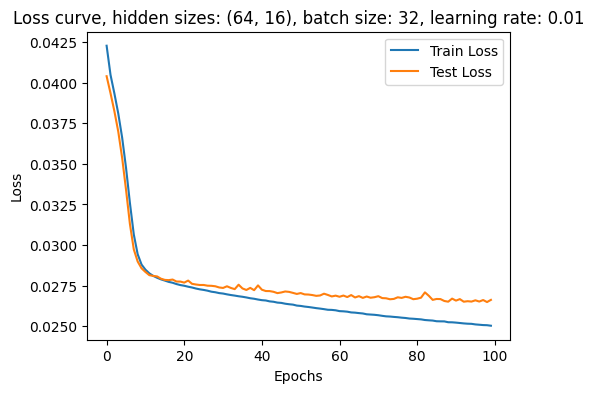

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0430, Testing loss: 0.0407, MAE (Test): 0.1672, R^2 (Test): 0.0262.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0409, Testing loss: 0.0399, MAE (Test): 0.1644, R^2 (Test): 0.0457.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0401, Testing loss: 0.0392, MAE (Test): 0.1621, R^2 (Test): 0.0618.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0393, Testing loss: 0.0385, MAE (Test): 0.1597, R^2 (Test): 0.0797.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0384, Testing loss: 0.0376, MAE (Test): 0.1568, R^2 (Test): 0.1017.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0373, Testing loss: 0.0364, MAE (Test): 0.1534, R^2 (Test): 0.1289.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0358, Testing loss: 0.0347, MAE (Test): 0.1479, R^2 (Test): 

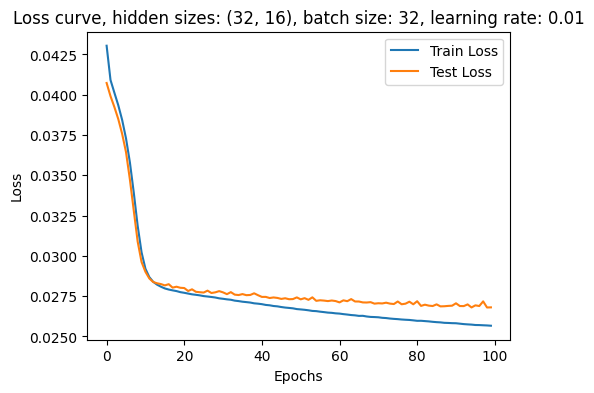

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0424, Testing loss: 0.0404, MAE (Test): 0.1666, R^2 (Test): 0.0334.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0405, Testing loss: 0.0395, MAE (Test): 0.1635, R^2 (Test): 0.0547.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0396, Testing loss: 0.0386, MAE (Test): 0.1605, R^2 (Test): 0.0781.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0385, Testing loss: 0.0375, MAE (Test): 0.1571, R^2 (Test): 0.1043.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0372, Testing loss: 0.0361, MAE (Test): 0.1528, R^2 (Test): 0.1370.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0356, Testing loss: 0.0345, MAE (Test): 0.1475, R^2 (Test): 0.1762.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0337, Testing loss: 0.0325, MAE (Test): 0.1406, R^2 (Test): 

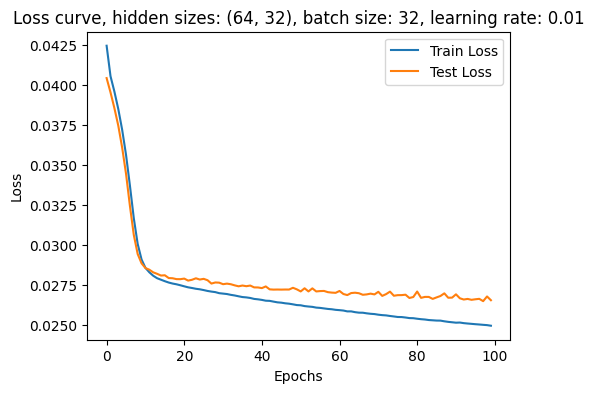

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0420, Testing loss: 0.0399, MAE (Test): 0.1650, R^2 (Test): 0.0468.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0397, Testing loss: 0.0386, MAE (Test): 0.1607, R^2 (Test): 0.0761.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0384, Testing loss: 0.0373, MAE (Test): 0.1567, R^2 (Test): 0.1078.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0368, Testing loss: 0.0357, MAE (Test): 0.1516, R^2 (Test): 0.1474.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0349, Testing loss: 0.0337, MAE (Test): 0.1453, R^2 (Test): 0.1940.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0329, Testing loss: 0.0318, MAE (Test): 0.1385, R^2 (Test): 0.2386.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0310, Testing loss: 0.0302, MAE (Test): 0.1317, R^2 (

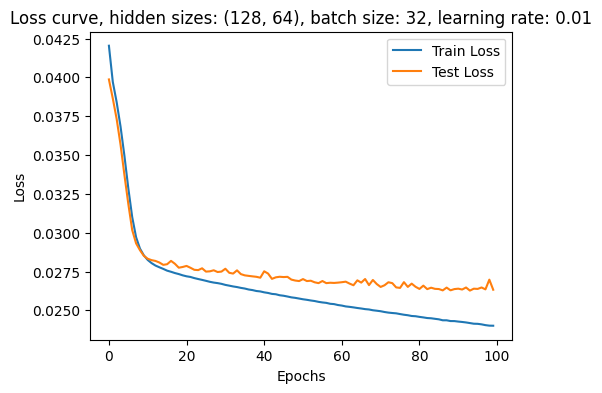

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0436, Testing loss: 0.0397, MAE (Test): 0.1644, R^2 (Test): 0.0500.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0396, Testing loss: 0.0385, MAE (Test): 0.1605, R^2 (Test): 0.0785.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0383, Testing loss: 0.0373, MAE (Test): 0.1564, R^2 (Test): 0.1077.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0369, Testing loss: 0.0358, MAE (Test): 0.1519, R^2 (Test): 0.1441.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0352, Testing loss: 0.0341, MAE (Test): 0.1465, R^2 (Test): 0.1855.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0332, Testing loss: 0.0322, MAE (Test): 0.1399, R^2 (Test): 0.2290.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0313, Testing loss: 0.0306, MAE (Test): 0.1331, R^2 (

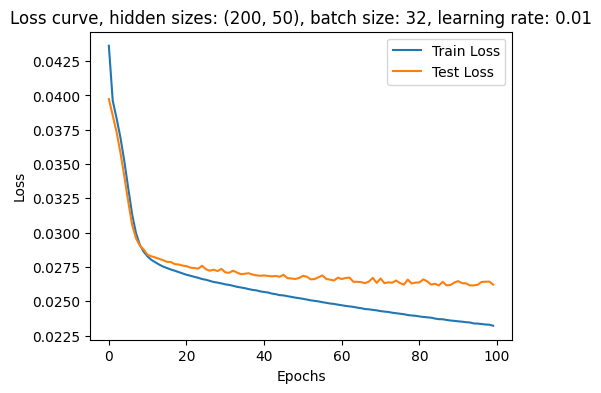

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0441, Testing loss: 0.0412, MAE (Test): 0.1690, R^2 (Test): 0.0147.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0415, Testing loss: 0.0405, MAE (Test): 0.1667, R^2 (Test): 0.0316.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0408, Testing loss: 0.0400, MAE (Test): 0.1648, R^2 (Test): 0.0446.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0403, Testing loss: 0.0394, MAE (Test): 0.1631, R^2 (Test): 0.0568.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0398, Testing loss: 0.0390, MAE (Test): 0.1614, R^2 (Test): 0.0685.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0392, Testing loss: 0.0385, MAE (Test): 0.1598, R^2 (Test): 0.0803.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0387, Testing loss: 0.0379, MAE (Test): 0.1581, R^2 (Test): 

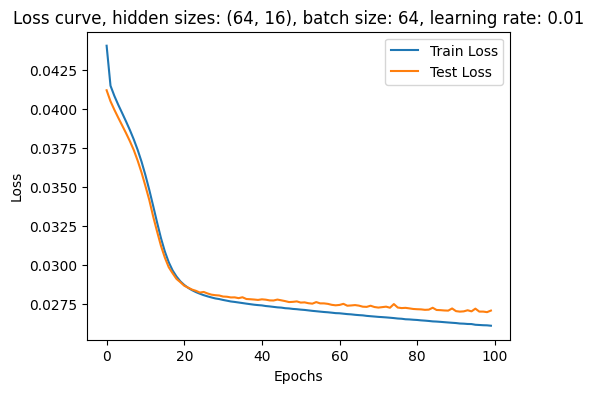

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0459, Testing loss: 0.0415, MAE (Test): 0.1701, R^2 (Test): 0.0072.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0419, Testing loss: 0.0410, MAE (Test): 0.1686, R^2 (Test): 0.0206.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0414, Testing loss: 0.0405, MAE (Test): 0.1672, R^2 (Test): 0.0314.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0409, Testing loss: 0.0400, MAE (Test): 0.1656, R^2 (Test): 0.0436.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0403, Testing loss: 0.0395, MAE (Test): 0.1640, R^2 (Test): 0.0555.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0397, Testing loss: 0.0389, MAE (Test): 0.1621, R^2 (Test): 0.0700.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0390, Testing loss: 0.0383, MAE (Test): 0.1603, R^2 (Test): 

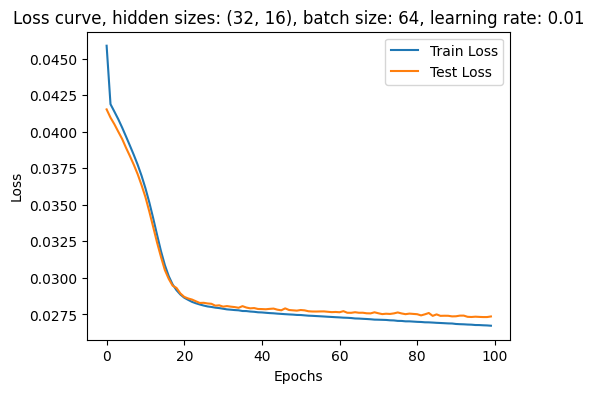

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0425, Testing loss: 0.0403, MAE (Test): 0.1668, R^2 (Test): 0.0366.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0405, Testing loss: 0.0396, MAE (Test): 0.1643, R^2 (Test): 0.0542.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0397, Testing loss: 0.0389, MAE (Test): 0.1621, R^2 (Test): 0.0691.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0391, Testing loss: 0.0383, MAE (Test): 0.1601, R^2 (Test): 0.0836.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0384, Testing loss: 0.0377, MAE (Test): 0.1579, R^2 (Test): 0.0991.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0377, Testing loss: 0.0370, MAE (Test): 0.1557, R^2 (Test): 0.1150.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0369, Testing loss: 0.0363, MAE (Test): 0.1533, R^2 (Test): 

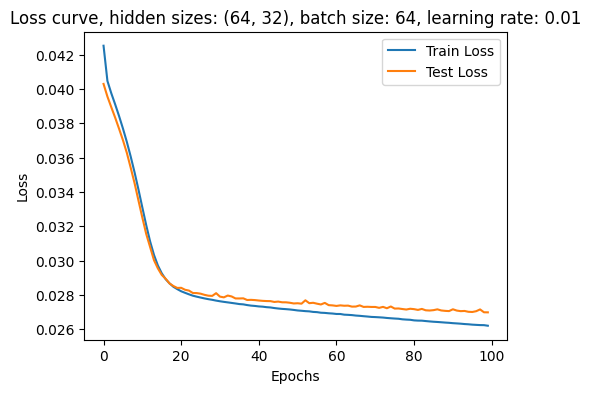

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0442, Testing loss: 0.0409, MAE (Test): 0.1682, R^2 (Test): 0.0225.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0408, Testing loss: 0.0399, MAE (Test): 0.1650, R^2 (Test): 0.0464.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0399, Testing loss: 0.0391, MAE (Test): 0.1624, R^2 (Test): 0.0659.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0391, Testing loss: 0.0384, MAE (Test): 0.1601, R^2 (Test): 0.0823.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0384, Testing loss: 0.0377, MAE (Test): 0.1577, R^2 (Test): 0.0997.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0376, Testing loss: 0.0370, MAE (Test): 0.1555, R^2 (Test): 0.1150.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0367, Testing loss: 0.0361, MAE (Test): 0.1525, R^2 (

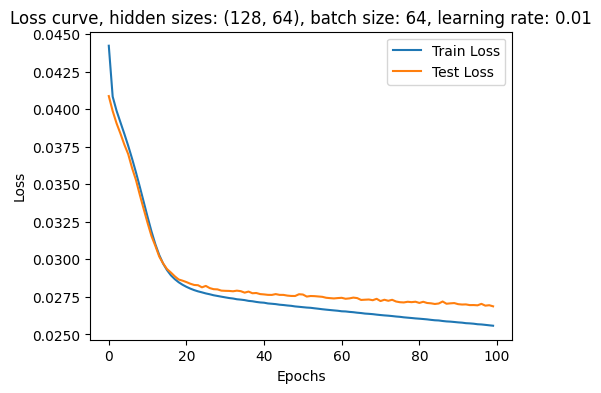

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0426, Testing loss: 0.0402, MAE (Test): 0.1667, R^2 (Test): 0.0379.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0403, Testing loss: 0.0392, MAE (Test): 0.1634, R^2 (Test): 0.0623.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0394, Testing loss: 0.0385, MAE (Test): 0.1609, R^2 (Test): 0.0803.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0386, Testing loss: 0.0378, MAE (Test): 0.1585, R^2 (Test): 0.0965.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0378, Testing loss: 0.0370, MAE (Test): 0.1560, R^2 (Test): 0.1160.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0370, Testing loss: 0.0362, MAE (Test): 0.1534, R^2 (Test): 0.1345.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0362, Testing loss: 0.0354, MAE (Test): 0.1508, R^2 (

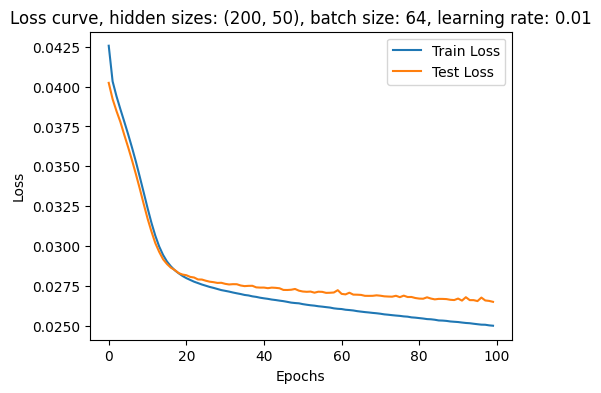

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0428, Testing loss: 0.0412, MAE (Test): 0.1690, R^2 (Test): 0.0160.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0414, Testing loss: 0.0405, MAE (Test): 0.1670, R^2 (Test): 0.0307.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0408, Testing loss: 0.0401, MAE (Test): 0.1656, R^2 (Test): 0.0404.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0404, Testing loss: 0.0398, MAE (Test): 0.1644, R^2 (Test): 0.0486.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0401, Testing loss: 0.0395, MAE (Test): 0.1634, R^2 (Test): 0.0562.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0397, Testing loss: 0.0392, MAE (Test): 0.1625, R^2 (Test): 0.0629.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (64, 16), Training loss: 0.0394, Testing loss: 0.0389, MAE (Test): 0.1615, R^2 (Test): 

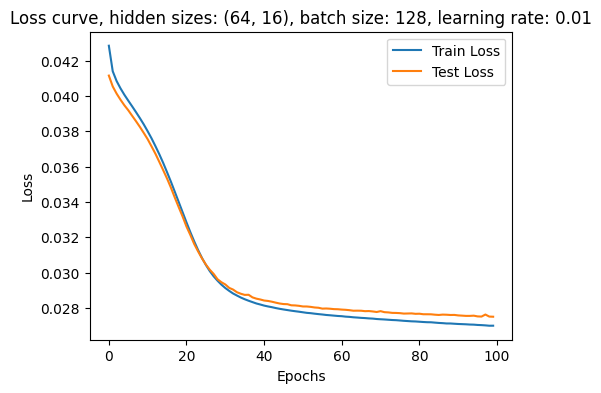

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0431, Testing loss: 0.0418, MAE (Test): 0.1711, R^2 (Test): 0.0008.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0423, Testing loss: 0.0414, MAE (Test): 0.1700, R^2 (Test): 0.0105.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0419, Testing loss: 0.0411, MAE (Test): 0.1691, R^2 (Test): 0.0180.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0416, Testing loss: 0.0408, MAE (Test): 0.1683, R^2 (Test): 0.0236.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0414, Testing loss: 0.0406, MAE (Test): 0.1675, R^2 (Test): 0.0296.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0411, Testing loss: 0.0404, MAE (Test): 0.1668, R^2 (Test): 0.0344.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (32, 16), Training loss: 0.0409, Testing loss: 0.0401, MAE (Test): 0.1660, R^2 (Test): 

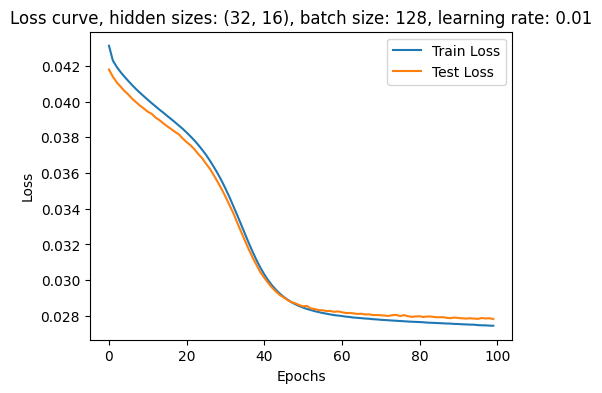

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0487, Testing loss: 0.0419, MAE (Test): 0.1718, R^2 (Test): -0.0023.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0420, Testing loss: 0.0410, MAE (Test): 0.1691, R^2 (Test): 0.0208.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0412, Testing loss: 0.0404, MAE (Test): 0.1672, R^2 (Test): 0.0342.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0407, Testing loss: 0.0400, MAE (Test): 0.1658, R^2 (Test): 0.0439.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0404, Testing loss: 0.0397, MAE (Test): 0.1646, R^2 (Test): 0.0517.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0400, Testing loss: 0.0394, MAE (Test): 0.1636, R^2 (Test): 0.0584.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (64, 32), Training loss: 0.0397, Testing loss: 0.0391, MAE (Test): 0.1626, R^2 (Test):

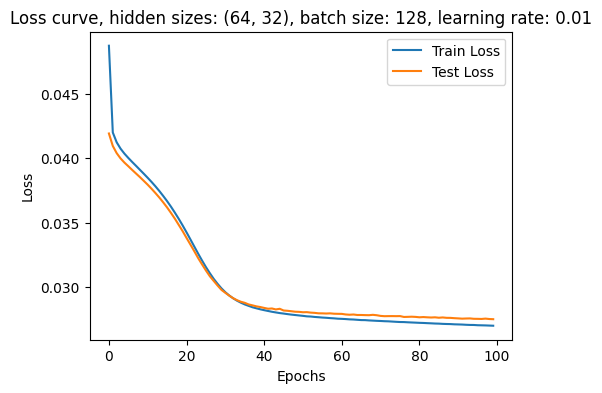

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0465, Testing loss: 0.0415, MAE (Test): 0.1705, R^2 (Test): 0.0069.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0417, Testing loss: 0.0407, MAE (Test): 0.1680, R^2 (Test): 0.0259.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0411, Testing loss: 0.0403, MAE (Test): 0.1664, R^2 (Test): 0.0375.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0406, Testing loss: 0.0399, MAE (Test): 0.1651, R^2 (Test): 0.0462.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0403, Testing loss: 0.0396, MAE (Test): 0.1640, R^2 (Test): 0.0537.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0399, Testing loss: 0.0393, MAE (Test): 0.1630, R^2 (Test): 0.0604.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (128, 64), Training loss: 0.0396, Testing loss: 0.0390, MAE (Test): 0.1621, R^2 (

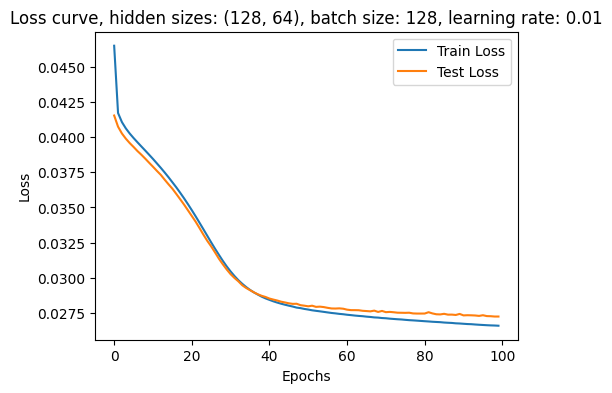

Epoch: 1/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0467, Testing loss: 0.0413, MAE (Test): 0.1693, R^2 (Test): 0.0124.
Epoch: 2/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0413, Testing loss: 0.0405, MAE (Test): 0.1666, R^2 (Test): 0.0318.
Epoch: 3/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0407, Testing loss: 0.0400, MAE (Test): 0.1650, R^2 (Test): 0.0435.
Epoch: 4/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0403, Testing loss: 0.0396, MAE (Test): 0.1637, R^2 (Test): 0.0526.
Epoch: 5/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0399, Testing loss: 0.0393, MAE (Test): 0.1626, R^2 (Test): 0.0609.
Epoch: 6/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0395, Testing loss: 0.0389, MAE (Test): 0.1614, R^2 (Test): 0.0690.
Epoch: 7/100, Learning Rate: 0.01, Hidden Sizes: (200, 50), Training loss: 0.0391, Testing loss: 0.0386, MAE (Test): 0.1604, R^2 (

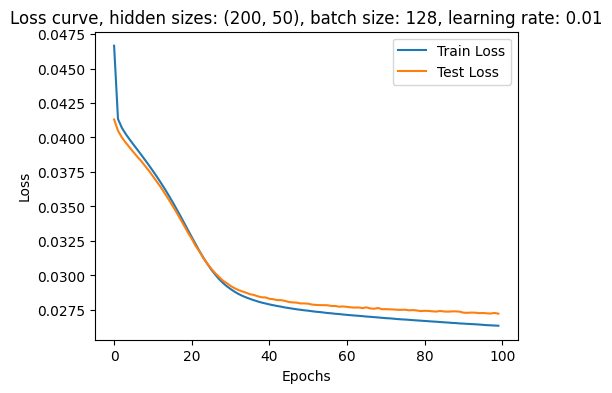

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0369, Testing loss: 0.0299, MAE (Test): 0.1284, R^2 (Test): 0.2848.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0294, Testing loss: 0.0285, MAE (Test): 0.1222, R^2 (Test): 0.3177.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0286, Testing loss: 0.0284, MAE (Test): 0.1219, R^2 (Test): 0.3203.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0283, Testing loss: 0.0309, MAE (Test): 0.1329, R^2 (Test): 0.2621.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0279, Testing loss: 0.0321, MAE (Test): 0.1360, R^2 (Test): 0.2321.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0277, Testing loss: 0.0277, MAE (Test): 0.1204, R^2 (Test): 0.3367.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0274, Testing loss: 0.0276, MAE (Test): 0.1186, R^2 (Test): 0.3410.

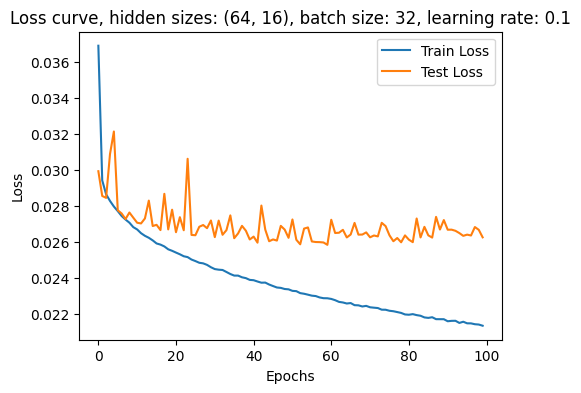

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0359, Testing loss: 0.0300, MAE (Test): 0.1289, R^2 (Test): 0.2836.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0293, Testing loss: 0.0287, MAE (Test): 0.1244, R^2 (Test): 0.3140.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0286, Testing loss: 0.0285, MAE (Test): 0.1225, R^2 (Test): 0.3188.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0282, Testing loss: 0.0280, MAE (Test): 0.1206, R^2 (Test): 0.3317.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0279, Testing loss: 0.0288, MAE (Test): 0.1259, R^2 (Test): 0.3103.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0277, Testing loss: 0.0282, MAE (Test): 0.1231, R^2 (Test): 0.3257.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0275, Testing loss: 0.0276, MAE (Test): 0.1201, R^2 (Test): 0.3399.

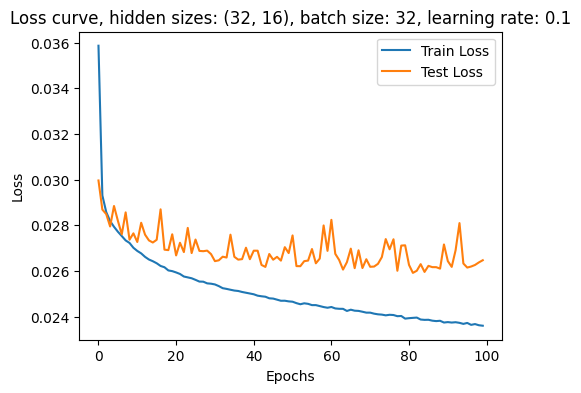

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0363, Testing loss: 0.0317, MAE (Test): 0.1353, R^2 (Test): 0.2422.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0293, Testing loss: 0.0288, MAE (Test): 0.1237, R^2 (Test): 0.3104.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0283, Testing loss: 0.0283, MAE (Test): 0.1235, R^2 (Test): 0.3226.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0278, Testing loss: 0.0280, MAE (Test): 0.1221, R^2 (Test): 0.3294.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0275, Testing loss: 0.0277, MAE (Test): 0.1215, R^2 (Test): 0.3372.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0272, Testing loss: 0.0277, MAE (Test): 0.1218, R^2 (Test): 0.3369.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0270, Testing loss: 0.0289, MAE (Test): 0.1252, R^2 (Test): 0.3102.

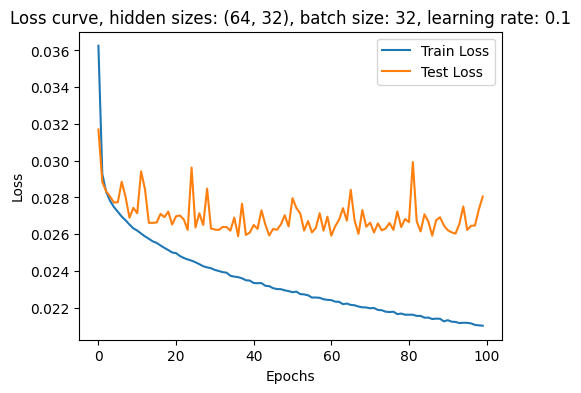

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0356, Testing loss: 0.0298, MAE (Test): 0.1274, R^2 (Test): 0.2867.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0292, Testing loss: 0.0285, MAE (Test): 0.1237, R^2 (Test): 0.3179.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0284, Testing loss: 0.0285, MAE (Test): 0.1233, R^2 (Test): 0.3178.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0278, Testing loss: 0.0280, MAE (Test): 0.1224, R^2 (Test): 0.3294.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0274, Testing loss: 0.0278, MAE (Test): 0.1202, R^2 (Test): 0.3348.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0271, Testing loss: 0.0277, MAE (Test): 0.1212, R^2 (Test): 0.3380.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0268, Testing loss: 0.0273, MAE (Test): 0.1183, R^2 (Test): 

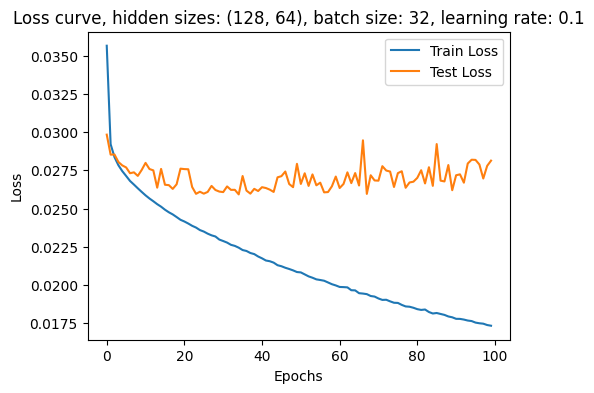

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0351, Testing loss: 0.0296, MAE (Test): 0.1281, R^2 (Test): 0.2923.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0291, Testing loss: 0.0322, MAE (Test): 0.1334, R^2 (Test): 0.2311.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0280, Testing loss: 0.0332, MAE (Test): 0.1394, R^2 (Test): 0.2063.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0276, Testing loss: 0.0278, MAE (Test): 0.1202, R^2 (Test): 0.3358.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0271, Testing loss: 0.0294, MAE (Test): 0.1242, R^2 (Test): 0.2959.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0267, Testing loss: 0.0272, MAE (Test): 0.1183, R^2 (Test): 0.3489.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0265, Testing loss: 0.0275, MAE (Test): 0.1183, R^2 (Test): 

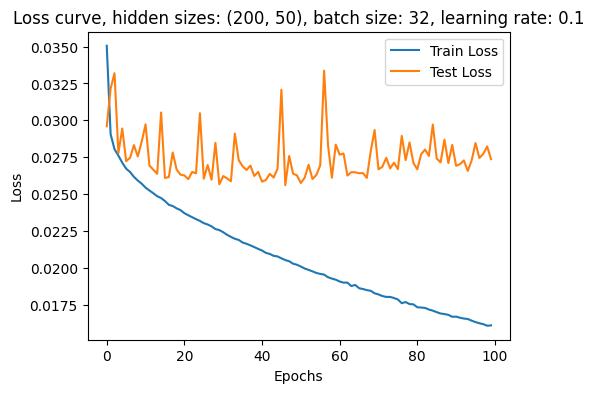

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0391, Testing loss: 0.0346, MAE (Test): 0.1478, R^2 (Test): 0.1726.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0313, Testing loss: 0.0288, MAE (Test): 0.1248, R^2 (Test): 0.3116.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0289, Testing loss: 0.0282, MAE (Test): 0.1224, R^2 (Test): 0.3246.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0283, Testing loss: 0.0283, MAE (Test): 0.1212, R^2 (Test): 0.3232.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0279, Testing loss: 0.0278, MAE (Test): 0.1201, R^2 (Test): 0.3355.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0277, Testing loss: 0.0279, MAE (Test): 0.1205, R^2 (Test): 0.3338.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0275, Testing loss: 0.0276, MAE (Test): 0.1205, R^2 (Test): 0.3394.

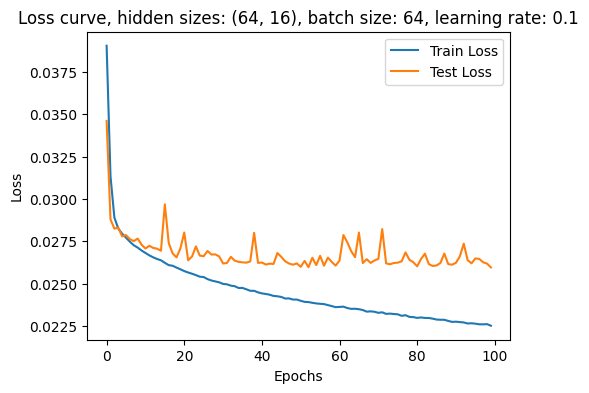

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0395, Testing loss: 0.0360, MAE (Test): 0.1514, R^2 (Test): 0.1400.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0321, Testing loss: 0.0292, MAE (Test): 0.1272, R^2 (Test): 0.3014.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0289, Testing loss: 0.0287, MAE (Test): 0.1236, R^2 (Test): 0.3146.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0284, Testing loss: 0.0291, MAE (Test): 0.1243, R^2 (Test): 0.3031.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0282, Testing loss: 0.0283, MAE (Test): 0.1232, R^2 (Test): 0.3225.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0279, Testing loss: 0.0282, MAE (Test): 0.1220, R^2 (Test): 0.3255.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0278, Testing loss: 0.0296, MAE (Test): 0.1268, R^2 (Test): 0.2933.

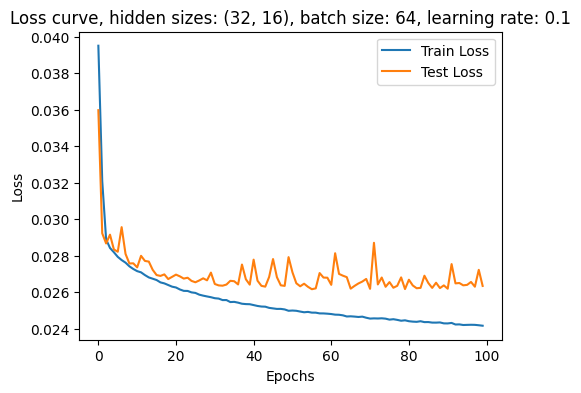

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0390, Testing loss: 0.0339, MAE (Test): 0.1463, R^2 (Test): 0.1886.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0309, Testing loss: 0.0290, MAE (Test): 0.1251, R^2 (Test): 0.3066.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0288, Testing loss: 0.0288, MAE (Test): 0.1237, R^2 (Test): 0.3115.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0284, Testing loss: 0.0313, MAE (Test): 0.1341, R^2 (Test): 0.2515.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0281, Testing loss: 0.0286, MAE (Test): 0.1240, R^2 (Test): 0.3150.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0279, Testing loss: 0.0279, MAE (Test): 0.1205, R^2 (Test): 0.3328.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0277, Testing loss: 0.0281, MAE (Test): 0.1216, R^2 (Test): 0.3277.

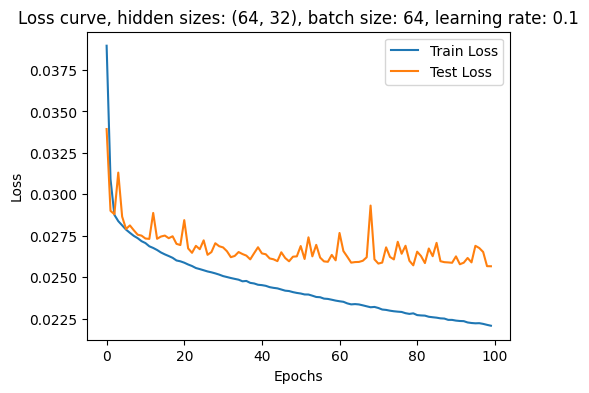

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0394, Testing loss: 0.0352, MAE (Test): 0.1496, R^2 (Test): 0.1575.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0319, Testing loss: 0.0293, MAE (Test): 0.1273, R^2 (Test): 0.3003.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0288, Testing loss: 0.0312, MAE (Test): 0.1309, R^2 (Test): 0.2539.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0282, Testing loss: 0.0282, MAE (Test): 0.1213, R^2 (Test): 0.3250.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0278, Testing loss: 0.0284, MAE (Test): 0.1237, R^2 (Test): 0.3219.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0276, Testing loss: 0.0284, MAE (Test): 0.1238, R^2 (Test): 0.3202.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0272, Testing loss: 0.0282, MAE (Test): 0.1213, R^2 (Test): 

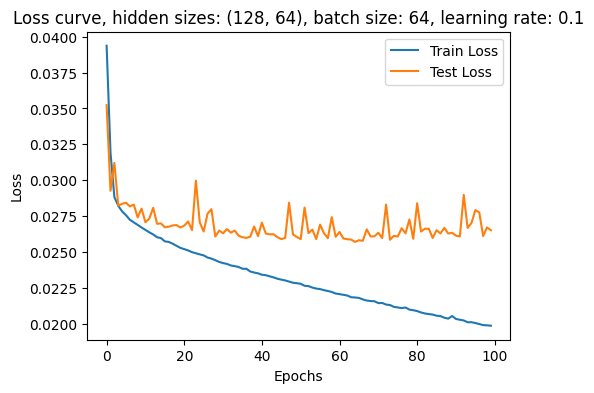

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0378, Testing loss: 0.0334, MAE (Test): 0.1424, R^2 (Test): 0.2012.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0304, Testing loss: 0.0291, MAE (Test): 0.1259, R^2 (Test): 0.3035.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0286, Testing loss: 0.0285, MAE (Test): 0.1224, R^2 (Test): 0.3178.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0281, Testing loss: 0.0278, MAE (Test): 0.1205, R^2 (Test): 0.3352.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0276, Testing loss: 0.0279, MAE (Test): 0.1207, R^2 (Test): 0.3339.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0272, Testing loss: 0.0279, MAE (Test): 0.1216, R^2 (Test): 0.3332.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0270, Testing loss: 0.0273, MAE (Test): 0.1189, R^2 (Test): 

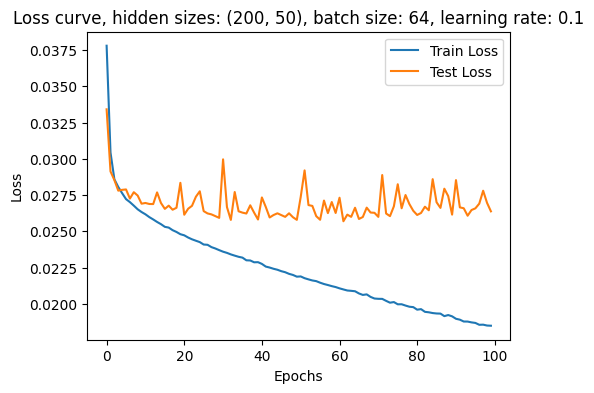

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0419, Testing loss: 0.0386, MAE (Test): 0.1608, R^2 (Test): 0.0778.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0375, Testing loss: 0.0357, MAE (Test): 0.1512, R^2 (Test): 0.1472.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0335, Testing loss: 0.0321, MAE (Test): 0.1384, R^2 (Test): 0.2330.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0299, Testing loss: 0.0291, MAE (Test): 0.1261, R^2 (Test): 0.3033.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0287, Testing loss: 0.0290, MAE (Test): 0.1234, R^2 (Test): 0.3078.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0283, Testing loss: 0.0282, MAE (Test): 0.1215, R^2 (Test): 0.3251.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (64, 16), Training loss: 0.0281, Testing loss: 0.0283, MAE (Test): 0.1223, R^2 (Test): 0.3235.

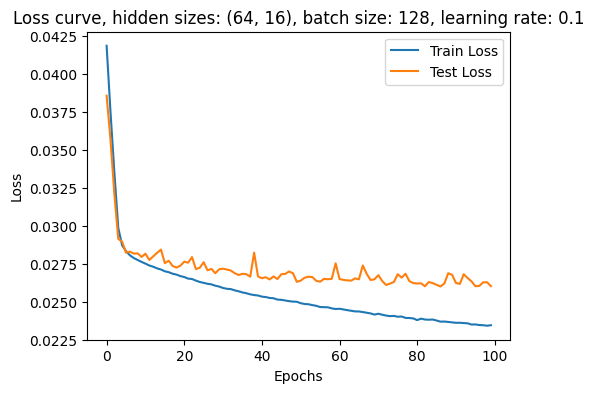

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0412, Testing loss: 0.0384, MAE (Test): 0.1596, R^2 (Test): 0.0817.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0371, Testing loss: 0.0347, MAE (Test): 0.1484, R^2 (Test): 0.1704.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0323, Testing loss: 0.0304, MAE (Test): 0.1317, R^2 (Test): 0.2742.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0293, Testing loss: 0.0287, MAE (Test): 0.1229, R^2 (Test): 0.3129.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0286, Testing loss: 0.0290, MAE (Test): 0.1255, R^2 (Test): 0.3056.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0284, Testing loss: 0.0283, MAE (Test): 0.1212, R^2 (Test): 0.3235.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (32, 16), Training loss: 0.0282, Testing loss: 0.0283, MAE (Test): 0.1223, R^2 (Test): 0.3230.

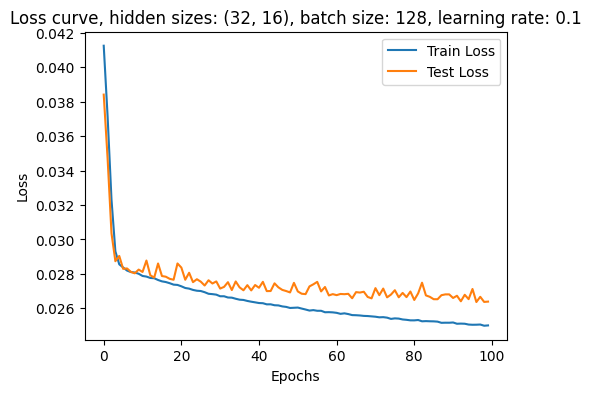

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0410, Testing loss: 0.0391, MAE (Test): 0.1620, R^2 (Test): 0.0642.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0383, Testing loss: 0.0366, MAE (Test): 0.1542, R^2 (Test): 0.1254.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0347, Testing loss: 0.0324, MAE (Test): 0.1400, R^2 (Test): 0.2247.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0306, Testing loss: 0.0293, MAE (Test): 0.1274, R^2 (Test): 0.2994.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0288, Testing loss: 0.0286, MAE (Test): 0.1236, R^2 (Test): 0.3168.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0283, Testing loss: 0.0283, MAE (Test): 0.1215, R^2 (Test): 0.3244.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (64, 32), Training loss: 0.0280, Testing loss: 0.0281, MAE (Test): 0.1211, R^2 (Test): 0.3291.

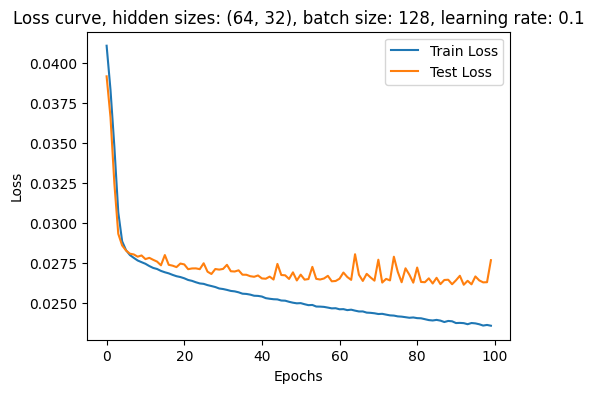

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0407, Testing loss: 0.0381, MAE (Test): 0.1589, R^2 (Test): 0.0890.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0367, Testing loss: 0.0344, MAE (Test): 0.1469, R^2 (Test): 0.1771.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0320, Testing loss: 0.0300, MAE (Test): 0.1299, R^2 (Test): 0.2838.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0293, Testing loss: 0.0286, MAE (Test): 0.1237, R^2 (Test): 0.3158.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0285, Testing loss: 0.0283, MAE (Test): 0.1215, R^2 (Test): 0.3238.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0281, Testing loss: 0.0281, MAE (Test): 0.1214, R^2 (Test): 0.3278.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (128, 64), Training loss: 0.0279, Testing loss: 0.0280, MAE (Test): 0.1206, R^2 (Test): 

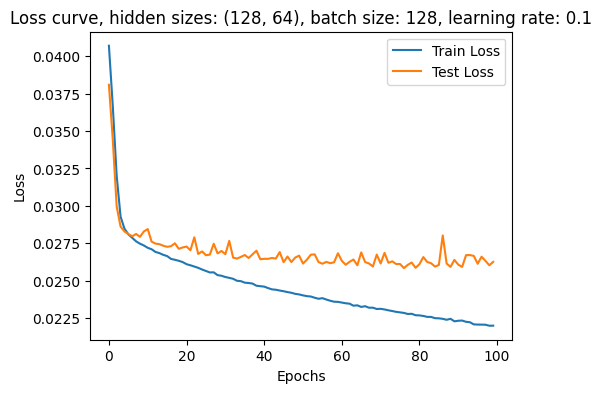

Epoch: 1/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0411, Testing loss: 0.0384, MAE (Test): 0.1592, R^2 (Test): 0.0823.
Epoch: 2/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0365, Testing loss: 0.0340, MAE (Test): 0.1454, R^2 (Test): 0.1882.
Epoch: 3/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0319, Testing loss: 0.0298, MAE (Test): 0.1298, R^2 (Test): 0.2873.
Epoch: 4/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0293, Testing loss: 0.0286, MAE (Test): 0.1231, R^2 (Test): 0.3151.
Epoch: 5/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0285, Testing loss: 0.0283, MAE (Test): 0.1213, R^2 (Test): 0.3241.
Epoch: 6/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0281, Testing loss: 0.0279, MAE (Test): 0.1214, R^2 (Test): 0.3333.
Epoch: 7/100, Learning Rate: 0.1, Hidden Sizes: (200, 50), Training loss: 0.0278, Testing loss: 0.0279, MAE (Test): 0.1204, R^2 (Test): 

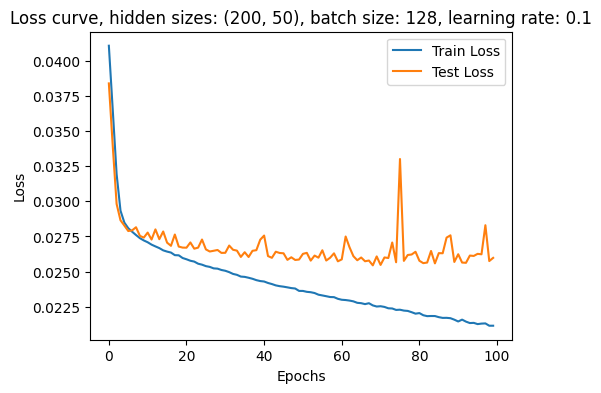

Best Hyperparameters: (69, 0.1, 128, (200, 50))


In [ ]:
num_epochs = 100
learning_rate_values = [0.01, 0.1]
batch_sizes = [32, 64, 128]
hidden_size_combinations = [(64, 16), (32, 16), (64, 32), (128, 64), (200, 50)]

results = {}

best_hyperparameters = None
best_test_loss = float('inf')
best_epoch_for_train_loss = None

for learning_rate, batch_size, hidden_sizes in product(learning_rate_values, batch_sizes, hidden_size_combinations):
    hidden_size1, hidden_size2 = hidden_sizes
    neural_net = NeuralNet(hidden_size1, hidden_size2).to(device)

    optimizer = torch.optim.SGD(neural_net.parameters(), lr=learning_rate)

    loss_fn = torch.nn.MSELoss()
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    train_loss_history = []
    test_loss_history = []
    test_mae_history = []
    test_r2_history = []

    for epoch in range(num_epochs):
        train_loss = 0.0
        # Training
        neural_net.train()
        for batch_X, batch_y in train_loader:
            pred_train = neural_net(batch_X)
            loss_train = loss_fn(pred_train, batch_y.view(-1, 1))

            loss_train.backward()
            optimizer.step()
            optimizer.zero_grad()

            train_loss += loss_train.item()

        # Average training loss over all batches in the epoch
        avg_train_loss = train_loss / len(train_loader)

        # Testing
        neural_net.eval()
        with torch.no_grad():
            pred_test = neural_net(X_test_tensor)
            loss_test = loss_fn(pred_test, y_test_tensor.view(-1, 1))
            test_loss = loss_test.item()

            # MAE and R-squared calculation for testing data
            mae_test = mean_absolute_error(y_test_tensor.cpu().numpy(), pred_test.cpu().numpy())
            r2_test = r2_score(y_test_tensor.cpu().numpy(), pred_test.cpu().numpy())


        print(f'Epoch: {epoch + 1}/{num_epochs}, Learning Rate: {learning_rate}, Hidden Sizes: ({hidden_size1}, {hidden_size2}), '
                  f'Training loss: {avg_train_loss:.4f}, Testing loss: {test_loss:.4f}, MAE (Test): {mae_test:.4f}, R^2 (Test): {r2_test:.4f}.')

        train_loss_history.append(avg_train_loss)
        test_loss_history.append(test_loss)
        test_mae_history.append(mae_test)
        test_r2_history.append(r2_test)

        # Update the best hyperparameters based on the test loss
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_hyperparameters = (epoch + 1, learning_rate, batch_size, hidden_sizes)


    # Plot train and test curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Loss curve, hidden sizes: {hidden_sizes}, batch size: {batch_size}, learning rate: {learning_rate}')
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(test_loss_history, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    # Store the results for this hyperparameter combination
    results[(num_epochs, learning_rate, batch_size, hidden_sizes)] = {
        'train_loss_history': train_loss_history,
        'test_loss_history': test_loss_history,
        'test_mae_history': test_mae_history,
        'test_r2_history': test_r2_history,
        'best_epoch_for_train_loss': best_epoch_for_train_loss
    }

print("Best Hyperparameters:", best_hyperparameters)

In [ ]:
print(best_test_loss)

0.025441274046897888


Let's try to plot this:

Epoch: 1/70, Training loss: 0.0398, Testing loss: 0.0373, MAE (Test): 0.1564, R^2 (Test): 0.1083.
Epoch: 2/70, Training loss: 0.0358, Testing loss: 0.0335, MAE (Test): 0.1444, R^2 (Test): 0.1993.
Epoch: 3/70, Training loss: 0.0315, Testing loss: 0.0309, MAE (Test): 0.1344, R^2 (Test): 0.2610.
Epoch: 4/70, Training loss: 0.0290, Testing loss: 0.0285, MAE (Test): 0.1240, R^2 (Test): 0.3191.
Epoch: 5/70, Training loss: 0.0282, Testing loss: 0.0280, MAE (Test): 0.1217, R^2 (Test): 0.3301.
Epoch: 6/70, Training loss: 0.0278, Testing loss: 0.0279, MAE (Test): 0.1206, R^2 (Test): 0.3340.
Epoch: 7/70, Training loss: 0.0276, Testing loss: 0.0277, MAE (Test): 0.1198, R^2 (Test): 0.3380.
Epoch: 8/70, Training loss: 0.0274, Testing loss: 0.0278, MAE (Test): 0.1211, R^2 (Test): 0.3360.
Epoch: 9/70, Training loss: 0.0272, Testing loss: 0.0276, MAE (Test): 0.1204, R^2 (Test): 0.3408.
Epoch: 10/70, Training loss: 0.0270, Testing loss: 0.0275, MAE (Test): 0.1202, R^2 (Test): 0.3421.
Epoch: 11/70, Train

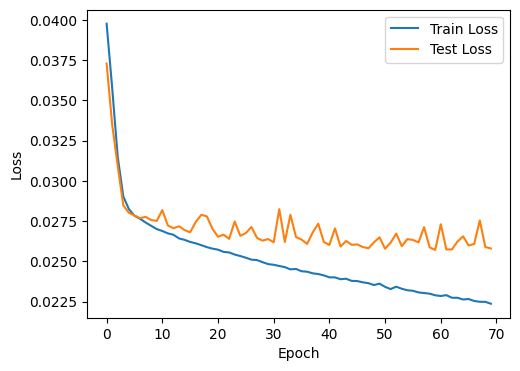

In [ ]:
num_epochs = 70
neural_net = NeuralNet(200,50).to(device)
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(neural_net.parameters(), lr=0.1)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


train_loss_history = []
test_loss_history = []
test_mae_history = []
test_r2_history = []

for epoch in range(num_epochs):
    train_loss = 0.0
    # Training
    neural_net.train()
    for batch_X, batch_y in train_loader:
        pred_train = neural_net(batch_X)
        loss_train = loss_fn(pred_train, batch_y.view(-1, 1))

        loss_train.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss_train.item()

    # Average training loss over all batches in the epoch
    avg_train_loss = train_loss / len(train_loader)

    # Testing
    neural_net.eval()
    with torch.no_grad():
        pred_test = neural_net(X_test_tensor)
        loss_test = loss_fn(pred_test, y_test_tensor.view(-1, 1))
        test_loss = loss_test.item()

        # MAE and R-squared calculation for testing data
        mae_test = mean_absolute_error(y_test_tensor.cpu().numpy(), pred_test.cpu().numpy())
        r2_test = r2_score(y_test_tensor.cpu().numpy(), pred_test.cpu().numpy())


    print(f'Epoch: {epoch + 1}/{num_epochs}, Training loss: {avg_train_loss:.4f}, Testing loss: {test_loss:.4f}, MAE (Test): {mae_test:.4f}, R^2 (Test): {r2_test:.4f}.')

    train_loss_history.append(avg_train_loss)
    test_loss_history.append(test_loss)
    test_mae_history.append(mae_test)
    test_r2_history.append(r2_test)



# Plot train and test curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Let's try to use a different optimizer - Adam.

Epoch: 1/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0487, Testing loss: 0.0315, MAE (Test): 0.1359, R^2 (Test): 0.2464.
Epoch: 2/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0294, Testing loss: 0.0285, MAE (Test): 0.1220, R^2 (Test): 0.3193.
Epoch: 3/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0281, Testing loss: 0.0281, MAE (Test): 0.1199, R^2 (Test): 0.3286.
Epoch: 4/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0277, Testing loss: 0.0279, MAE (Test): 0.1191, R^2 (Test): 0.3329.
Epoch: 5/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0274, Testing loss: 0.0276, MAE (Test): 0.1184, R^2 (Test): 0.3392.
Epoch: 6/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0272, Testing loss: 0.0275, MAE (Test): 0.1185, R^2 (Test): 0.3425.
Epoch: 7/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0269, Testing loss: 0.0274, MAE (Test): 0.1174, R^2 (

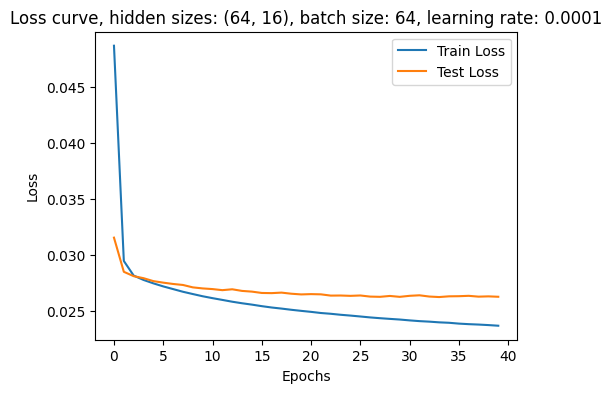

Epoch: 1/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0645, Testing loss: 0.0352, MAE (Test): 0.1495, R^2 (Test): 0.1587.
Epoch: 2/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0320, Testing loss: 0.0293, MAE (Test): 0.1266, R^2 (Test): 0.2988.
Epoch: 3/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0286, Testing loss: 0.0283, MAE (Test): 0.1210, R^2 (Test): 0.3240.
Epoch: 4/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0280, Testing loss: 0.0280, MAE (Test): 0.1197, R^2 (Test): 0.3306.
Epoch: 5/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0278, Testing loss: 0.0279, MAE (Test): 0.1198, R^2 (Test): 0.3338.
Epoch: 6/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0276, Testing loss: 0.0277, MAE (Test): 0.1187, R^2 (Test): 0.3380.
Epoch: 7/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0274, Testing loss: 0.0276, MAE (Test): 0.1189, R^2 (

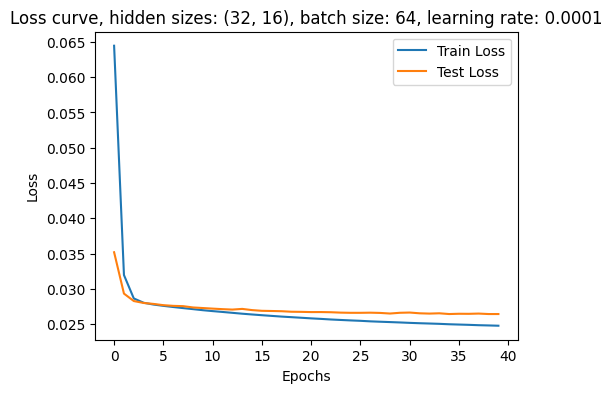

Epoch: 1/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0396, Testing loss: 0.0303, MAE (Test): 0.1313, R^2 (Test): 0.2753.
Epoch: 2/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0288, Testing loss: 0.0282, MAE (Test): 0.1215, R^2 (Test): 0.3253.
Epoch: 3/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0278, Testing loss: 0.0279, MAE (Test): 0.1196, R^2 (Test): 0.3333.
Epoch: 4/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0275, Testing loss: 0.0277, MAE (Test): 0.1186, R^2 (Test): 0.3375.
Epoch: 5/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0271, Testing loss: 0.0276, MAE (Test): 0.1190, R^2 (Test): 0.3399.
Epoch: 6/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0269, Testing loss: 0.0273, MAE (Test): 0.1180, R^2 (Test): 0.3478.
Epoch: 7/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0266, Testing loss: 0.0272, MAE (Test): 0.1169, R^2 (

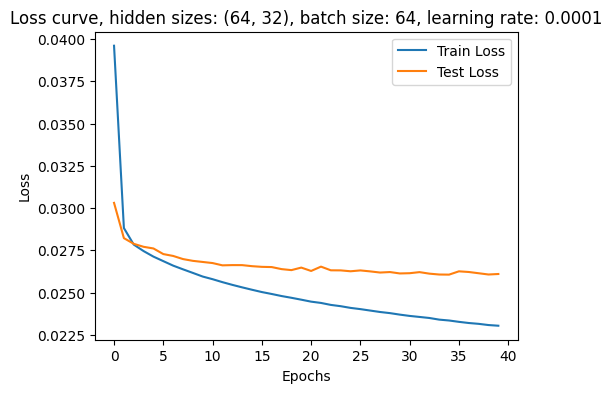

Epoch: 1/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0365, Testing loss: 0.0287, MAE (Test): 0.1243, R^2 (Test): 0.3130.
Epoch: 2/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0281, Testing loss: 0.0278, MAE (Test): 0.1203, R^2 (Test): 0.3362.
Epoch: 3/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0274, Testing loss: 0.0274, MAE (Test): 0.1186, R^2 (Test): 0.3460.
Epoch: 4/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0269, Testing loss: 0.0272, MAE (Test): 0.1177, R^2 (Test): 0.3486.
Epoch: 5/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0265, Testing loss: 0.0269, MAE (Test): 0.1163, R^2 (Test): 0.3556.
Epoch: 6/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0262, Testing loss: 0.0268, MAE (Test): 0.1158, R^2 (Test): 0.3602.
Epoch: 7/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0258, Testing loss: 0.0267, MAE (Test): 0.1168

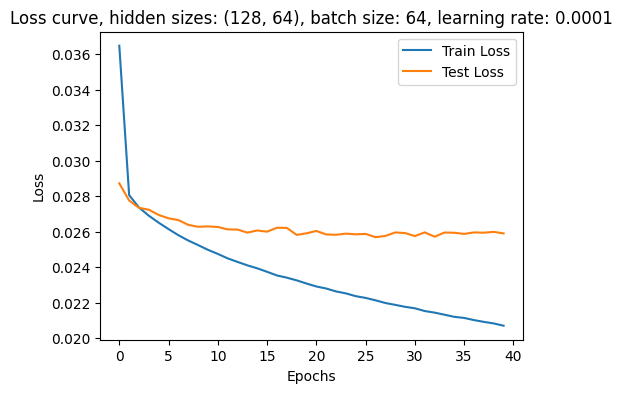

Epoch: 1/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0364, Testing loss: 0.0284, MAE (Test): 0.1228, R^2 (Test): 0.3207.
Epoch: 2/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0278, Testing loss: 0.0276, MAE (Test): 0.1189, R^2 (Test): 0.3406.
Epoch: 3/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0271, Testing loss: 0.0272, MAE (Test): 0.1176, R^2 (Test): 0.3499.
Epoch: 4/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0266, Testing loss: 0.0270, MAE (Test): 0.1164, R^2 (Test): 0.3553.
Epoch: 5/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0261, Testing loss: 0.0267, MAE (Test): 0.1158, R^2 (Test): 0.3619.
Epoch: 6/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0257, Testing loss: 0.0266, MAE (Test): 0.1157, R^2 (Test): 0.3642.
Epoch: 7/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0254, Testing loss: 0.0266, MAE (Test): 0.1157

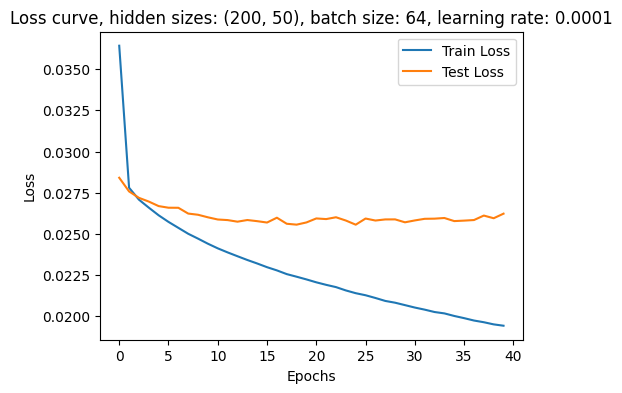

Epoch: 1/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0425, Testing loss: 0.0348, MAE (Test): 0.1480, R^2 (Test): 0.1681.
Epoch: 2/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0314, Testing loss: 0.0291, MAE (Test): 0.1256, R^2 (Test): 0.3052.
Epoch: 3/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0284, Testing loss: 0.0281, MAE (Test): 0.1209, R^2 (Test): 0.3269.
Epoch: 4/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0279, Testing loss: 0.0279, MAE (Test): 0.1198, R^2 (Test): 0.3327.
Epoch: 5/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0275, Testing loss: 0.0278, MAE (Test): 0.1191, R^2 (Test): 0.3349.
Epoch: 6/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0273, Testing loss: 0.0275, MAE (Test): 0.1185, R^2 (Test): 0.3414.
Epoch: 7/40, Learning Rate: 0.0001, Hidden Sizes: (64, 16), Training loss: 0.0271, Testing loss: 0.0274, MAE (Test): 0.1182, R^2 (

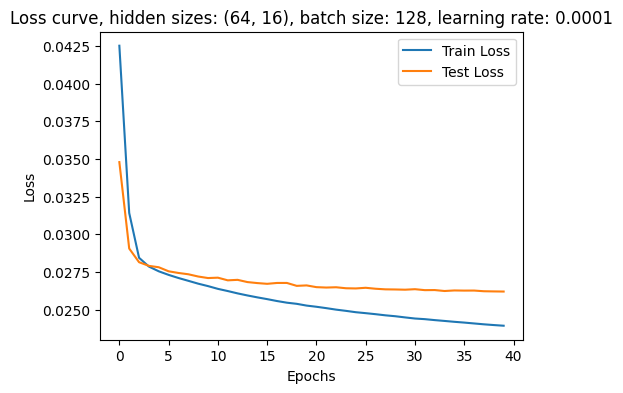

Epoch: 1/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0623, Testing loss: 0.0379, MAE (Test): 0.1595, R^2 (Test): 0.0938.
Epoch: 2/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0353, Testing loss: 0.0322, MAE (Test): 0.1397, R^2 (Test): 0.2298.
Epoch: 3/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0304, Testing loss: 0.0290, MAE (Test): 0.1251, R^2 (Test): 0.3068.
Epoch: 4/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0285, Testing loss: 0.0282, MAE (Test): 0.1212, R^2 (Test): 0.3249.
Epoch: 5/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0280, Testing loss: 0.0280, MAE (Test): 0.1199, R^2 (Test): 0.3307.
Epoch: 6/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0277, Testing loss: 0.0278, MAE (Test): 0.1195, R^2 (Test): 0.3353.
Epoch: 7/40, Learning Rate: 0.0001, Hidden Sizes: (32, 16), Training loss: 0.0276, Testing loss: 0.0277, MAE (Test): 0.1189, R^2 (

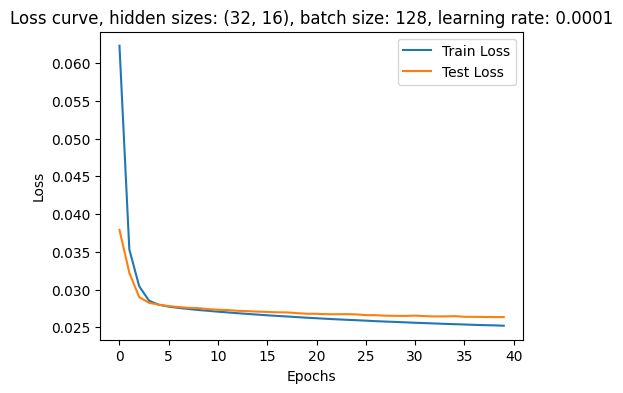

Epoch: 1/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0653, Testing loss: 0.0361, MAE (Test): 0.1514, R^2 (Test): 0.1364.
Epoch: 2/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0326, Testing loss: 0.0299, MAE (Test): 0.1291, R^2 (Test): 0.2856.
Epoch: 3/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0289, Testing loss: 0.0285, MAE (Test): 0.1224, R^2 (Test): 0.3185.
Epoch: 4/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0280, Testing loss: 0.0281, MAE (Test): 0.1204, R^2 (Test): 0.3276.
Epoch: 5/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0277, Testing loss: 0.0279, MAE (Test): 0.1201, R^2 (Test): 0.3329.
Epoch: 6/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0274, Testing loss: 0.0277, MAE (Test): 0.1190, R^2 (Test): 0.3388.
Epoch: 7/40, Learning Rate: 0.0001, Hidden Sizes: (64, 32), Training loss: 0.0272, Testing loss: 0.0275, MAE (Test): 0.1185, R^2 (

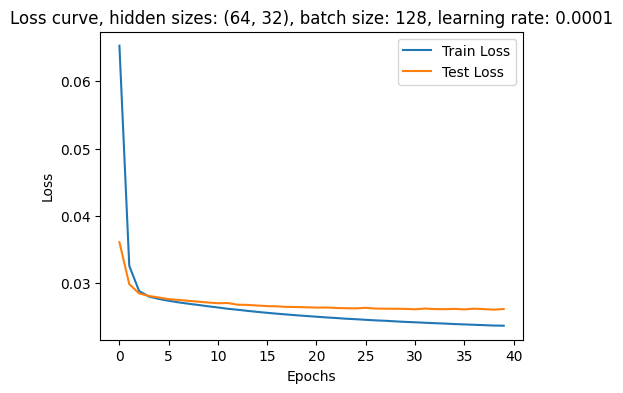

Epoch: 1/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0458, Testing loss: 0.0329, MAE (Test): 0.1412, R^2 (Test): 0.2135.
Epoch: 2/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0299, Testing loss: 0.0284, MAE (Test): 0.1226, R^2 (Test): 0.3221.
Epoch: 3/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0279, Testing loss: 0.0278, MAE (Test): 0.1200, R^2 (Test): 0.3360.
Epoch: 4/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0273, Testing loss: 0.0275, MAE (Test): 0.1189, R^2 (Test): 0.3421.
Epoch: 5/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0269, Testing loss: 0.0272, MAE (Test): 0.1181, R^2 (Test): 0.3490.
Epoch: 6/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0266, Testing loss: 0.0270, MAE (Test): 0.1170, R^2 (Test): 0.3539.
Epoch: 7/40, Learning Rate: 0.0001, Hidden Sizes: (128, 64), Training loss: 0.0263, Testing loss: 0.0269, MAE (Test): 0.1163

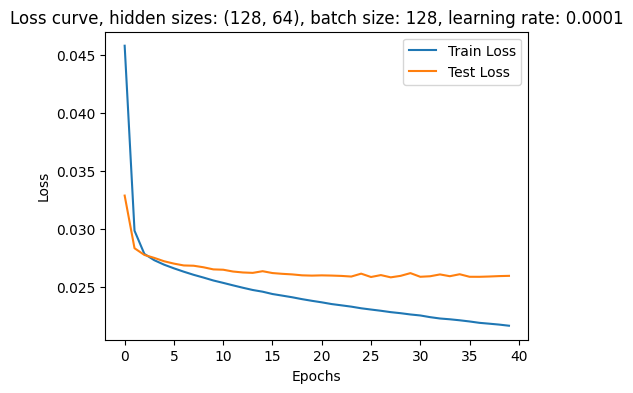

Epoch: 1/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0379, Testing loss: 0.0294, MAE (Test): 0.1280, R^2 (Test): 0.2959.
Epoch: 2/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0283, Testing loss: 0.0279, MAE (Test): 0.1206, R^2 (Test): 0.3336.
Epoch: 3/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0274, Testing loss: 0.0273, MAE (Test): 0.1182, R^2 (Test): 0.3462.
Epoch: 4/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0269, Testing loss: 0.0271, MAE (Test): 0.1174, R^2 (Test): 0.3523.
Epoch: 5/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0265, Testing loss: 0.0269, MAE (Test): 0.1164, R^2 (Test): 0.3578.
Epoch: 6/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0262, Testing loss: 0.0267, MAE (Test): 0.1166, R^2 (Test): 0.3611.
Epoch: 7/40, Learning Rate: 0.0001, Hidden Sizes: (200, 50), Training loss: 0.0258, Testing loss: 0.0266, MAE (Test): 0.1154

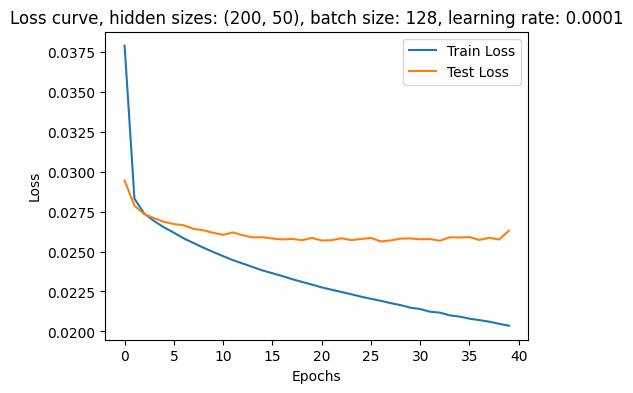

Epoch: 1/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0301, Testing loss: 0.0274, MAE (Test): 0.1183, R^2 (Test): 0.3446.
Epoch: 2/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0269, Testing loss: 0.0268, MAE (Test): 0.1160, R^2 (Test): 0.3583.
Epoch: 3/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0261, Testing loss: 0.0264, MAE (Test): 0.1143, R^2 (Test): 0.3681.
Epoch: 4/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0255, Testing loss: 0.0267, MAE (Test): 0.1144, R^2 (Test): 0.3624.
Epoch: 5/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0250, Testing loss: 0.0261, MAE (Test): 0.1132, R^2 (Test): 0.3761.
Epoch: 6/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0246, Testing loss: 0.0264, MAE (Test): 0.1147, R^2 (Test): 0.3696.
Epoch: 7/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0243, Testing loss: 0.0264, MAE (Test): 0.1142, R^2 (Test): 

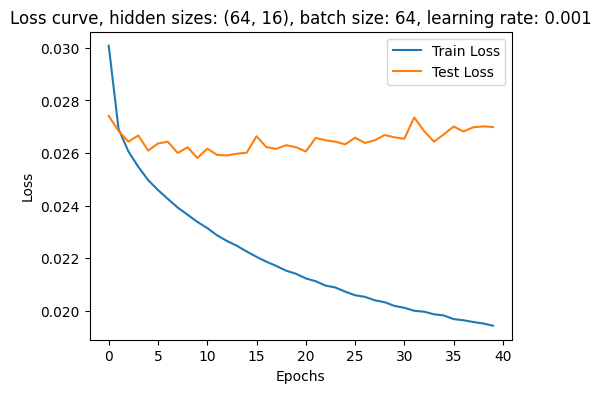

Epoch: 1/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0321, Testing loss: 0.0279, MAE (Test): 0.1197, R^2 (Test): 0.3322.
Epoch: 2/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0275, Testing loss: 0.0276, MAE (Test): 0.1182, R^2 (Test): 0.3393.
Epoch: 3/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0268, Testing loss: 0.0275, MAE (Test): 0.1193, R^2 (Test): 0.3424.
Epoch: 4/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0263, Testing loss: 0.0268, MAE (Test): 0.1167, R^2 (Test): 0.3581.
Epoch: 5/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0260, Testing loss: 0.0269, MAE (Test): 0.1168, R^2 (Test): 0.3563.
Epoch: 6/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0257, Testing loss: 0.0268, MAE (Test): 0.1156, R^2 (Test): 0.3596.
Epoch: 7/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0255, Testing loss: 0.0268, MAE (Test): 0.1156, R^2 (Test): 

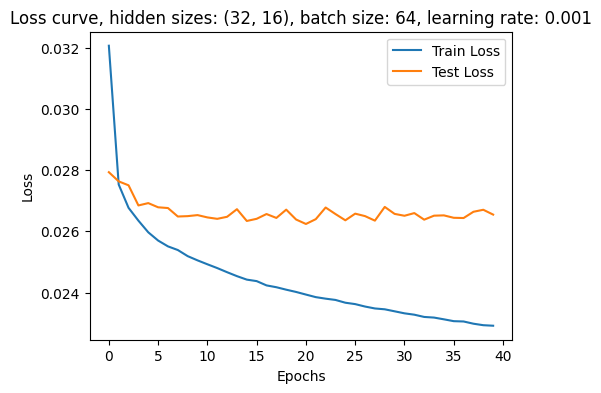

Epoch: 1/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0328, Testing loss: 0.0279, MAE (Test): 0.1200, R^2 (Test): 0.3325.
Epoch: 2/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0273, Testing loss: 0.0271, MAE (Test): 0.1167, R^2 (Test): 0.3527.
Epoch: 3/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0263, Testing loss: 0.0268, MAE (Test): 0.1157, R^2 (Test): 0.3595.
Epoch: 4/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0257, Testing loss: 0.0267, MAE (Test): 0.1156, R^2 (Test): 0.3625.
Epoch: 5/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0253, Testing loss: 0.0270, MAE (Test): 0.1171, R^2 (Test): 0.3546.
Epoch: 6/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0248, Testing loss: 0.0260, MAE (Test): 0.1146, R^2 (Test): 0.3785.
Epoch: 7/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0244, Testing loss: 0.0261, MAE (Test): 0.1138, R^2 (Test): 

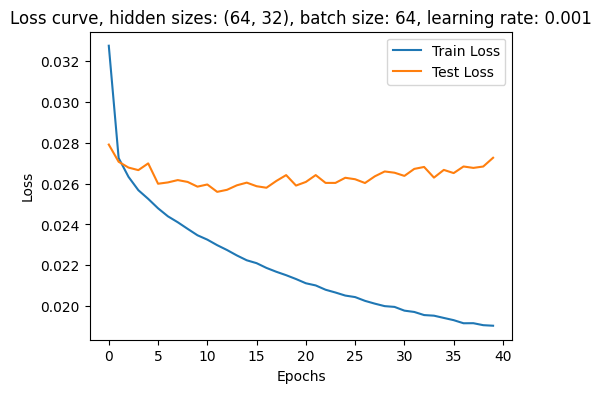

Epoch: 1/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0309, Testing loss: 0.0281, MAE (Test): 0.1214, R^2 (Test): 0.3270.
Epoch: 2/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0269, Testing loss: 0.0269, MAE (Test): 0.1160, R^2 (Test): 0.3575.
Epoch: 3/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0259, Testing loss: 0.0264, MAE (Test): 0.1148, R^2 (Test): 0.3683.
Epoch: 4/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0252, Testing loss: 0.0262, MAE (Test): 0.1145, R^2 (Test): 0.3742.
Epoch: 5/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0246, Testing loss: 0.0259, MAE (Test): 0.1125, R^2 (Test): 0.3811.
Epoch: 6/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0241, Testing loss: 0.0257, MAE (Test): 0.1130, R^2 (Test): 0.3864.
Epoch: 7/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0235, Testing loss: 0.0252, MAE (Test): 0.1111, R^2 (

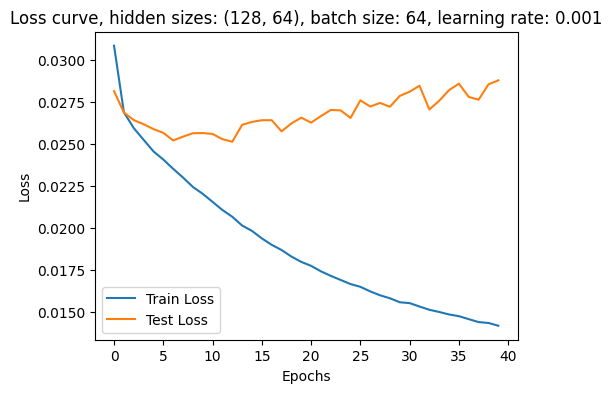

Epoch: 1/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0295, Testing loss: 0.0276, MAE (Test): 0.1189, R^2 (Test): 0.3399.
Epoch: 2/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0265, Testing loss: 0.0267, MAE (Test): 0.1152, R^2 (Test): 0.3619.
Epoch: 3/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0255, Testing loss: 0.0270, MAE (Test): 0.1178, R^2 (Test): 0.3552.
Epoch: 4/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0247, Testing loss: 0.0261, MAE (Test): 0.1132, R^2 (Test): 0.3769.
Epoch: 5/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0239, Testing loss: 0.0257, MAE (Test): 0.1131, R^2 (Test): 0.3852.
Epoch: 6/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0233, Testing loss: 0.0258, MAE (Test): 0.1120, R^2 (Test): 0.3826.
Epoch: 7/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0227, Testing loss: 0.0256, MAE (Test): 0.1117, R^2 (

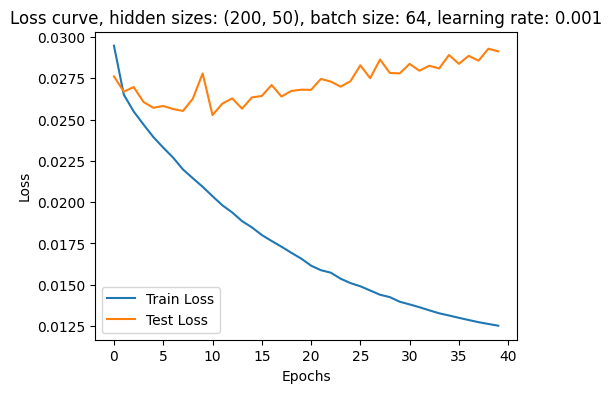

Epoch: 1/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0405, Testing loss: 0.0280, MAE (Test): 0.1199, R^2 (Test): 0.3310.
Epoch: 2/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0276, Testing loss: 0.0275, MAE (Test): 0.1196, R^2 (Test): 0.3415.
Epoch: 3/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0267, Testing loss: 0.0272, MAE (Test): 0.1177, R^2 (Test): 0.3500.
Epoch: 4/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0262, Testing loss: 0.0270, MAE (Test): 0.1171, R^2 (Test): 0.3554.
Epoch: 5/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0256, Testing loss: 0.0267, MAE (Test): 0.1154, R^2 (Test): 0.3617.
Epoch: 6/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0252, Testing loss: 0.0267, MAE (Test): 0.1151, R^2 (Test): 0.3618.
Epoch: 7/40, Learning Rate: 0.001, Hidden Sizes: (64, 16), Training loss: 0.0250, Testing loss: 0.0271, MAE (Test): 0.1171, R^2 (Test): 

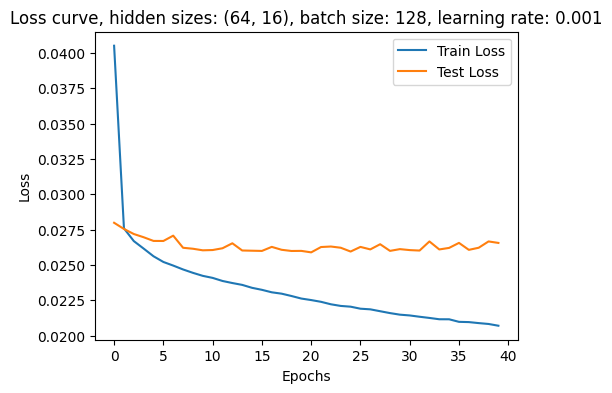

Epoch: 1/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0318, Testing loss: 0.0280, MAE (Test): 0.1205, R^2 (Test): 0.3305.
Epoch: 2/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0274, Testing loss: 0.0274, MAE (Test): 0.1178, R^2 (Test): 0.3437.
Epoch: 3/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0268, Testing loss: 0.0271, MAE (Test): 0.1166, R^2 (Test): 0.3511.
Epoch: 4/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0264, Testing loss: 0.0268, MAE (Test): 0.1168, R^2 (Test): 0.3583.
Epoch: 5/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0260, Testing loss: 0.0268, MAE (Test): 0.1176, R^2 (Test): 0.3584.
Epoch: 6/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0257, Testing loss: 0.0267, MAE (Test): 0.1169, R^2 (Test): 0.3618.
Epoch: 7/40, Learning Rate: 0.001, Hidden Sizes: (32, 16), Training loss: 0.0254, Testing loss: 0.0267, MAE (Test): 0.1157, R^2 (Test): 

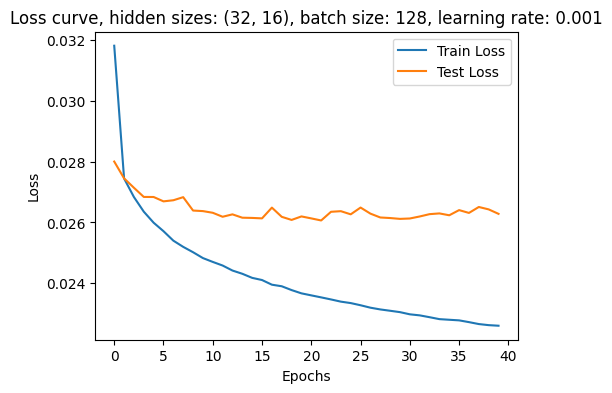

Epoch: 1/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0340, Testing loss: 0.0281, MAE (Test): 0.1196, R^2 (Test): 0.3275.
Epoch: 2/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0272, Testing loss: 0.0273, MAE (Test): 0.1187, R^2 (Test): 0.3465.
Epoch: 3/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0264, Testing loss: 0.0271, MAE (Test): 0.1179, R^2 (Test): 0.3532.
Epoch: 4/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0257, Testing loss: 0.0265, MAE (Test): 0.1162, R^2 (Test): 0.3666.
Epoch: 5/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0253, Testing loss: 0.0264, MAE (Test): 0.1143, R^2 (Test): 0.3689.
Epoch: 6/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0248, Testing loss: 0.0262, MAE (Test): 0.1140, R^2 (Test): 0.3724.
Epoch: 7/40, Learning Rate: 0.001, Hidden Sizes: (64, 32), Training loss: 0.0246, Testing loss: 0.0262, MAE (Test): 0.1142, R^2 (Test): 

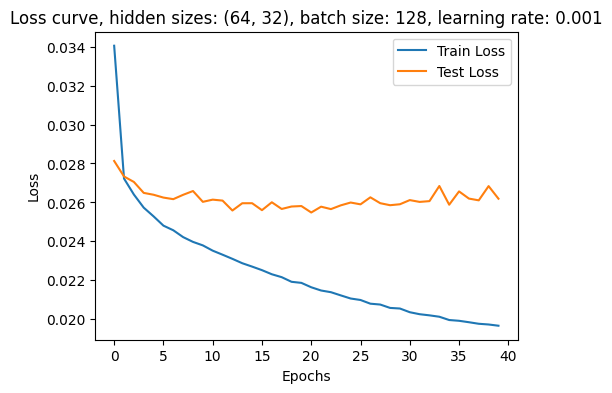

Epoch: 1/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0301, Testing loss: 0.0272, MAE (Test): 0.1172, R^2 (Test): 0.3488.
Epoch: 2/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0267, Testing loss: 0.0269, MAE (Test): 0.1161, R^2 (Test): 0.3580.
Epoch: 3/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0258, Testing loss: 0.0263, MAE (Test): 0.1157, R^2 (Test): 0.3719.
Epoch: 4/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0250, Testing loss: 0.0263, MAE (Test): 0.1152, R^2 (Test): 0.3718.
Epoch: 5/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0244, Testing loss: 0.0257, MAE (Test): 0.1127, R^2 (Test): 0.3849.
Epoch: 6/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0239, Testing loss: 0.0255, MAE (Test): 0.1125, R^2 (Test): 0.3893.
Epoch: 7/40, Learning Rate: 0.001, Hidden Sizes: (128, 64), Training loss: 0.0234, Testing loss: 0.0258, MAE (Test): 0.1125, R^2 (

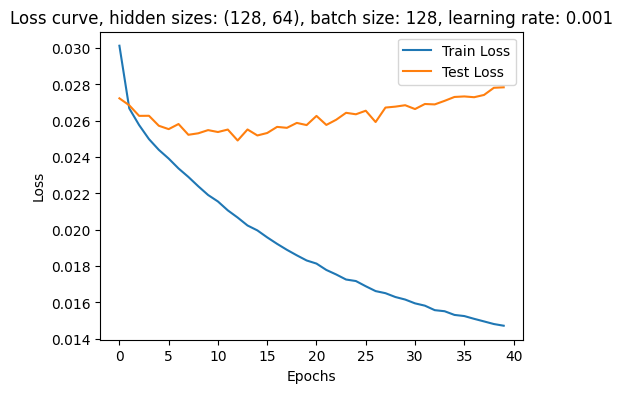

Epoch: 1/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0307, Testing loss: 0.0274, MAE (Test): 0.1190, R^2 (Test): 0.3438.
Epoch: 2/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0267, Testing loss: 0.0271, MAE (Test): 0.1176, R^2 (Test): 0.3532.
Epoch: 3/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0257, Testing loss: 0.0263, MAE (Test): 0.1152, R^2 (Test): 0.3718.
Epoch: 4/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0249, Testing loss: 0.0260, MAE (Test): 0.1137, R^2 (Test): 0.3775.
Epoch: 5/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0243, Testing loss: 0.0262, MAE (Test): 0.1141, R^2 (Test): 0.3732.
Epoch: 6/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0238, Testing loss: 0.0257, MAE (Test): 0.1126, R^2 (Test): 0.3853.
Epoch: 7/40, Learning Rate: 0.001, Hidden Sizes: (200, 50), Training loss: 0.0231, Testing loss: 0.0261, MAE (Test): 0.1141, R^2 (

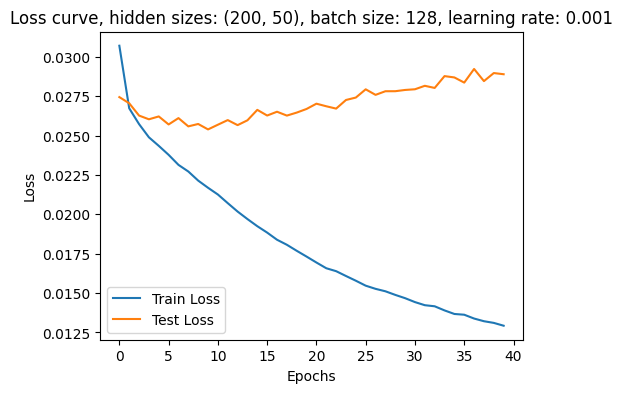

Best Hyperparameters: (13, 0.001, 128, (128, 64))


In [ ]:
num_epochs = 40
learning_rate_values = [0.0001, 0.001]
batch_sizes = [64, 128]
hidden_size_combinations = [(64, 16), (32, 16), (64, 32), (128, 64), (200, 50)]

results = {}

best_hyperparameters = None
best_test_loss = float('inf')
best_epoch_for_train_loss = None

for learning_rate, batch_size, hidden_sizes in product(learning_rate_values, batch_sizes, hidden_size_combinations):
    hidden_size1, hidden_size2 = hidden_sizes
    neural_net = NeuralNet(hidden_size1, hidden_size2).to(device)

    optimizer = torch.optim.Adam(neural_net.parameters(), lr=learning_rate)
    loss_fn = torch.nn.MSELoss()
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

    train_loss_history = []
    test_loss_history = []
    test_mae_history = []
    test_r2_history = []

    for epoch in range(num_epochs):
        train_loss = 0.0
        # Training
        neural_net.train()
        for batch_X, batch_y in train_loader:
            pred_train = neural_net(batch_X)
            loss_train = loss_fn(pred_train, batch_y.view(-1, 1))

            loss_train.backward()
            optimizer.step()
            optimizer.zero_grad()

            train_loss += loss_train.item()

        # Average training loss over all batches in the epoch
        avg_train_loss = train_loss / len(train_loader)

        # Testing
        neural_net.eval()
        with torch.no_grad():
            pred_test = neural_net(X_test_tensor)
            loss_test = loss_fn(pred_test, y_test_tensor.view(-1, 1))
            test_loss = loss_test.item()

            # MAE and R-squared calculation for testing data
            mae_test = mean_absolute_error(y_test_tensor.cpu().numpy(), pred_test.cpu().numpy())
            r2_test = r2_score(y_test_tensor.cpu().numpy(), pred_test.cpu().numpy())


        print(f'Epoch: {epoch + 1}/{num_epochs}, Learning Rate: {learning_rate}, Hidden Sizes: ({hidden_size1}, {hidden_size2}), '
                  f'Training loss: {avg_train_loss:.4f}, Testing loss: {test_loss:.4f}, MAE (Test): {mae_test:.4f}, R^2 (Test): {r2_test:.4f}.')

        train_loss_history.append(avg_train_loss)
        test_loss_history.append(test_loss)
        test_mae_history.append(mae_test)
        test_r2_history.append(r2_test)

        # Update the best hyperparameters based on the test loss
        if test_loss < best_test_loss:
            best_test_loss = test_loss
            best_hyperparameters = (epoch + 1, learning_rate, batch_size, hidden_sizes)


    # Plot train and test curves
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.title(f'Loss curve, hidden sizes: {hidden_sizes}, batch size: {batch_size}, learning rate: {learning_rate}')
    plt.plot(train_loss_history, label='Train Loss')
    plt.plot(test_loss_history, label='Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


    # Store the results for this hyperparameter combination
    results[(num_epochs, learning_rate, batch_size, hidden_sizes)] = {
        'train_loss_history': train_loss_history,
        'test_loss_history': test_loss_history,
        'test_mae_history': test_mae_history,
        'test_r2_history': test_r2_history,
        'best_epoch_for_train_loss': best_epoch_for_train_loss
    }

print("Best Hyperparameters:", best_hyperparameters)

Result: In epoch 13 with learning rate 0.001, batch size 128 and hidden layer sizes 128 and 64 we found the best test loss result.

In [ ]:
print(best_test_loss)

0.02491416223347187


Let's try to plot this:

Epoch: 1/13, Training loss: 0.0302, Testing loss: 0.0278, MAE (Test): 0.1211, R^2 (Test): 0.3343.
Epoch: 2/13, Training loss: 0.0268, Testing loss: 0.0269, MAE (Test): 0.1166, R^2 (Test): 0.3579.
Epoch: 3/13, Training loss: 0.0258, Testing loss: 0.0267, MAE (Test): 0.1154, R^2 (Test): 0.3616.
Epoch: 4/13, Training loss: 0.0251, Testing loss: 0.0262, MAE (Test): 0.1140, R^2 (Test): 0.3742.
Epoch: 5/13, Training loss: 0.0244, Testing loss: 0.0259, MAE (Test): 0.1136, R^2 (Test): 0.3796.
Epoch: 6/13, Training loss: 0.0239, Testing loss: 0.0259, MAE (Test): 0.1130, R^2 (Test): 0.3809.
Epoch: 7/13, Training loss: 0.0234, Testing loss: 0.0260, MAE (Test): 0.1132, R^2 (Test): 0.3772.
Epoch: 8/13, Training loss: 0.0230, Testing loss: 0.0259, MAE (Test): 0.1140, R^2 (Test): 0.3809.
Epoch: 9/13, Training loss: 0.0225, Testing loss: 0.0261, MAE (Test): 0.1142, R^2 (Test): 0.3758.
Epoch: 10/13, Training loss: 0.0221, Testing loss: 0.0256, MAE (Test): 0.1120, R^2 (Test): 0.3879.
Epoch: 11/13, Train

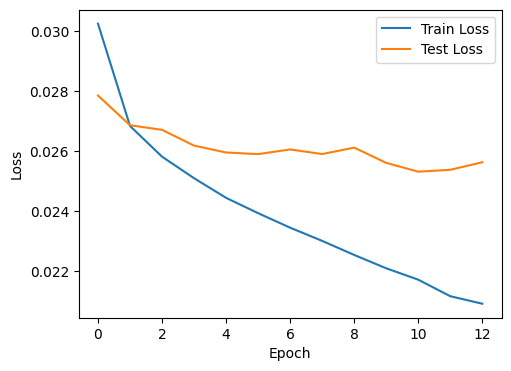

In [ ]:
num_epochs = 13
neural_net = NeuralNet(128, 64).to(device)
optimizer = torch.optim.Adam(neural_net.parameters(), lr=0.001)
loss_fn = torch.nn.MSELoss()
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


train_loss_history = []
test_loss_history = []
test_mae_history = []
test_r2_history = []

for epoch in range(num_epochs):
    train_loss = 0.0
    # Training
    neural_net.train()
    for batch_X, batch_y in train_loader:
        pred_train = neural_net(batch_X)
        loss_train = loss_fn(pred_train, batch_y.view(-1, 1))

        loss_train.backward()
        optimizer.step()
        optimizer.zero_grad()

        train_loss += loss_train.item()

    # Average training loss over all batches in the epoch
    avg_train_loss = train_loss / len(train_loader)

    # Testing
    neural_net.eval()
    with torch.no_grad():
        pred_test = neural_net(X_test_tensor)
        loss_test = loss_fn(pred_test, y_test_tensor.view(-1, 1))
        test_loss = loss_test.item()

        # MAE and R-squared calculation for testing data
        mae_test = mean_absolute_error(y_test_tensor.cpu().numpy(), pred_test.cpu().numpy())
        r2_test = r2_score(y_test_tensor.cpu().numpy(), pred_test.cpu().numpy())


    print(f'Epoch: {epoch + 1}/{num_epochs}, Training loss: {avg_train_loss:.4f}, Testing loss: {test_loss:.4f}, MAE (Test): {mae_test:.4f}, R^2 (Test): {r2_test:.4f}.')

    train_loss_history.append(avg_train_loss)
    test_loss_history.append(test_loss)
    test_mae_history.append(mae_test)
    test_r2_history.append(r2_test)



# Plot train and test curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Try to decrease the generalization gap by adding regularization:

Epoch: 1/20, Training loss: 0.0306, Testing loss: 0.0279, MAE (Test): 0.1197, R^2 (Test): 0.3323.
Epoch: 2/20, Training loss: 0.0273, Testing loss: 0.0270, MAE (Test): 0.1181, R^2 (Test): 0.3539.
Epoch: 3/20, Training loss: 0.0267, Testing loss: 0.0269, MAE (Test): 0.1173, R^2 (Test): 0.3560.
Epoch: 4/20, Training loss: 0.0263, Testing loss: 0.0275, MAE (Test): 0.1204, R^2 (Test): 0.3433.
Epoch: 5/20, Training loss: 0.0260, Testing loss: 0.0266, MAE (Test): 0.1170, R^2 (Test): 0.3630.
Epoch: 6/20, Training loss: 0.0256, Testing loss: 0.0265, MAE (Test): 0.1151, R^2 (Test): 0.3664.
Epoch: 7/20, Training loss: 0.0254, Testing loss: 0.0272, MAE (Test): 0.1202, R^2 (Test): 0.3490.
Epoch: 8/20, Training loss: 0.0251, Testing loss: 0.0264, MAE (Test): 0.1156, R^2 (Test): 0.3699.
Epoch: 9/20, Training loss: 0.0249, Testing loss: 0.0264, MAE (Test): 0.1142, R^2 (Test): 0.3689.
Epoch: 10/20, Training loss: 0.0248, Testing loss: 0.0260, MAE (Test): 0.1142, R^2 (Test): 0.3787.
Epoch: 11/20, Train

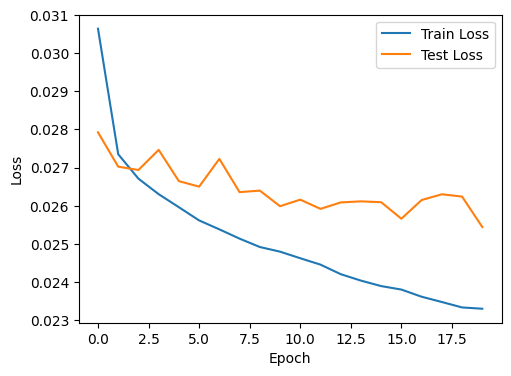

In [ ]:
num_epochs = 20
neural_net = NeuralNet(128, 64).to(device)
optimizer = torch.optim.Adam(neural_net.parameters(), lr=0.001, weight_decay = 0.0001)
loss_fn = torch.nn.MSELoss()
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)


train_loss_history = []
test_loss_history = []
test_mae_history = []
test_r2_history = []


for epoch in range(num_epochs):
        train_loss = 0.0
        test_loss = 0.0

        # Training
        neural_net.train()
        for batch_X, batch_y in train_loader:
            pred_train = neural_net(batch_X)
            loss_train = loss_fn(pred_train, batch_y.view(-1, 1))

            loss_train.backward()
            optimizer.step()
            optimizer.zero_grad()

            train_loss += loss_train.item()

        # Average training loss over all batches in the epoch
        avg_train_loss = train_loss / len(train_loader)

        # Testing
        neural_net.eval()
        with torch.no_grad():
            pred_test = neural_net(X_test_tensor)
            loss_test = loss_fn(pred_test, y_test_tensor.view(-1, 1))
            test_loss = loss_test.item()

            # MAE and R-squared calculation for testing data
            mae_test = mean_absolute_error(y_test_tensor.cpu().numpy(), pred_test.cpu().numpy())
            r2_test = r2_score(y_test_tensor.cpu().numpy(), pred_test.cpu().numpy())


        print(f'Epoch: {epoch + 1}/{num_epochs}, Training loss: {avg_train_loss:.4f}, Testing loss: {test_loss:.4f}, MAE (Test): {mae_test:.4f}, R^2 (Test): {r2_test:.4f}.')

        train_loss_history.append(avg_train_loss)
        test_loss_history.append(test_loss)
        test_mae_history.append(mae_test)
        test_r2_history.append(r2_test)


# Plot train and test curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_history, label='Train Loss')
plt.plot(test_loss_history, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()